In [1]:
# For Data Manipulation
import json
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
df = pd.read_excel("customer_data.xlsx")
df.head(3)

Full name   Age  Marital Status  Gender  \
0    sweta singh  15-25         Single  Female   
1      Ajay Babu  15-25         Single    Male   
2  Ajumal Khan A  15-25         Single    Male   

  Which type of organization do you work for? Name of Profession  \
0                                     Private                 hr   
1                                     Private          Logistics   
2                                    Business      Self Employed   

  What is the type of home that you own? Number of Floors in House  \
0                          Flat(On Rent)                        4+   
1             Independent house or Villa              Ground Floor   
2             Independent house or Villa                  2 Floors   

   How many people live in your household(including children)?  \
0                                                NaN             
1                                                5.0             
2                                                5.0             

  No of Rooms in your house   ...  \
0                          3  ...   
1                          4  ...   
2                          4  ...   

  What maximum investment would you be willing to make in solar?  \
0                                      50,000- 1 Lac               
1                                   Less than 50,000               
2                                      50,000- 1 Lac               

                         Which one would you prefer?  \
0  Saving 1000+/month saving on electricity bill ...   
1  Avail solar electricity at 50% down payment an...   
2  Avail solar electricity at 50% down payment an...   

                        Which one would you prefer ?  \
0                             4-star rated appliance   
1                             4-star rated appliance   
2  5-star rated appliance (with Extra services an...   

  Do you have any relative/friend that bought a solar system?  \
0                                                NaN            
1                                                 No            
2                                                NaN            

  Do you know any Solar Panel installation companies ?  \
0                                                 No     
1                                                Yes     
2                                                 No     

  Name the Solar company you know Who owns the house you live in?  \
0                   peacock solar                             NaN   
1                         Roofsol                             NaN   
2                        Enerparc                             NaN   

  Which city is your house at?  \
0                          NaN   
1                          NaN   
2                          NaN   

  Are you filling this form on behalf of your parents/others?  \
0                                                NaN            
1                                                NaN            
2                                                NaN            

   What are your computer brands?   
0                              NaN  
1                              NaN  
2                              NaN  

[3 rows x 62 columns]

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.dtypes

Full name                                                      object
Age                                                            object
Marital Status                                                 object
Gender                                                         object
Which type of organization do you work for?                    object
                                                                ...  
Name the Solar company you know                                object
Who owns the house you live in?                                object
Which city is your house at?                                   object
Are you filling this form on behalf of your parents/others?    object
What are your computer brands?                                 object
Length: 62, dtype: object

In [5]:
df.shape

(4798, 62)

In [6]:
feat_cols = df.columns[:-1].to_list()

In [7]:
fill_rate_df = pd.DataFrame(df[feat_cols].count()/df.shape[0]*100, columns=['fill_rate']).reset_index().rename(columns={'index': 'column_names'})
fill_rate_df

column_names   fill_rate
0                                           Full name   99.979158
1                                                 Age  100.000000
2                                      Marital Status  100.000000
3                                              Gender  100.000000
4         Which type of organization do you work for?   99.166319
..                                                ...         ...
56  Do you know any Solar Panel installation compa...  100.000000
57                    Name the Solar company you know   92.809504
58                    Who owns the house you live in?   98.937057
59                       Which city is your house at?   98.978741
60  Are you filling this form on behalf of your pa...   98.541059

[61 rows x 2 columns]

In [8]:
fill_rate_df.loc[(fill_rate_df['fill_rate']<=50), 'column_names']

37    What are your appliances brands?  [Computer]
Name: column_names, dtype: object

In [9]:
fill_rate_df[fill_rate_df['column_names'] == 'What are your appliances brands?  [Computer]']

column_names  fill_rate
37  What are your appliances brands?  [Computer]  20.508545

- `What are your appliances brands? [Computer]` has the lowest fill rate % which is 20.5%
- The dataset seems to have have a good fill rate % with nearly all the columns having a fill rate of 100%

In [10]:
df.duplicated(keep='first').sum()

1

In [11]:
df[(df['Full name'] == 'Swati')]

Full name    Age Marital Status  Gender  \
20      Swati  25-35         Single  Female   
619     Swati  15-25         Single  Female   

    Which type of organization do you work for? Name of Profession  \
20                                      Private             Banker   
619                                     Private             Doctor   

    What is the type of home that you own? Number of Floors in House  \
20              Independent house or Villa                   1 Floor   
619             Independent house or Villa                  2 Floors   

     How many people live in your household(including children)?  \
20                                                 8.0             
619                                                5.0             

    No of Rooms in your house  ...  \
20                         5+  ...   
619                         4  ...   

    What maximum investment would you be willing to make in solar?  \
20                                    Less than 50,000               
619                                   Less than 50,000               

                           Which one would you prefer?  \
20   Saving 1000+/month saving on electricity bill ...   
619  Avail solar electricity at 50% down payment an...   

                          Which one would you prefer ?  \
20   5-star rated appliance (with Extra services an...   
619                             4-star rated appliance   

    Do you have any relative/friend that bought a solar system?  \
20                                                  No            
619                                                Yes            

    Do you know any Solar Panel installation companies ?  \
20                                                  No     
619                                                 No     

    Name the Solar company you know Who owns the house you live in?  \
20                        dont know                             NaN   
619                         Havells                      My parents   

    Which city is your house at?  \
20                           NaN   
619                Muzaffarnagar   

    Are you filling this form on behalf of your parents/others?  \
20                                                 NaN            
619                                                Yes            

     What are your computer brands?  
20                              NaN  
619                             NaN  

[2 rows x 62 columns]

In [12]:
df.describe()

How many people live in your household(including children)?  \
count                                        4797.000000             
mean                                            4.632062             
std                                             2.007990             
min                                             1.000000             
25%                                             3.000000             
50%                                             4.000000             
75%                                             5.000000             
max                                            10.000000             

       Rate the following websites in terms of your usage time [Google]  \
count                                        4798.000000                  
mean                                            2.979158                  
std                                             1.419357                  
min                                             1.000000                  
25%                                             2.000000                  
50%                                             3.000000                  
75%                                             4.000000                  
max                                             5.000000                  

       Rate the following websites in terms of your usage time [Facebook]  \
count                                        4798.000000                    
mean                                            2.399750                    
std                                             1.282268                    
min                                             1.000000                    
25%                                             1.000000                    
50%                                             2.000000                    
75%                                             3.000000                    
max                                             5.000000                    

       Rate the following websites in terms of your usage time [Whatsapp]  \
count                                        4798.000000                    
mean                                            2.954981                    
std                                             1.357679                    
min                                             1.000000                    
25%                                             2.000000                    
50%                                             3.000000                    
75%                                             4.000000                    
max                                             5.000000                    

       Rate the following websites in terms of your usage time [Youtube]  \
count                                        4798.000000                   
mean                                            2.939975                   
std                                             1.242255                   
min                                             1.000000                   
25%                                             2.000000                   
50%                                             3.000000                   
75%                                             4.000000                   
max                                             5.000000                   

       Rate the following websites in terms of your usage time [Other sites]  \
count                                        4798.000000                       
mean                                            2.630263                       
std                                             1.336463                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             3.000000                       
75%                                             4.000000           

/var/folders/2t/kws3z2h52bl_tmtkx1j12xnw0000gn/T/ipykernel_68752/3878986341.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


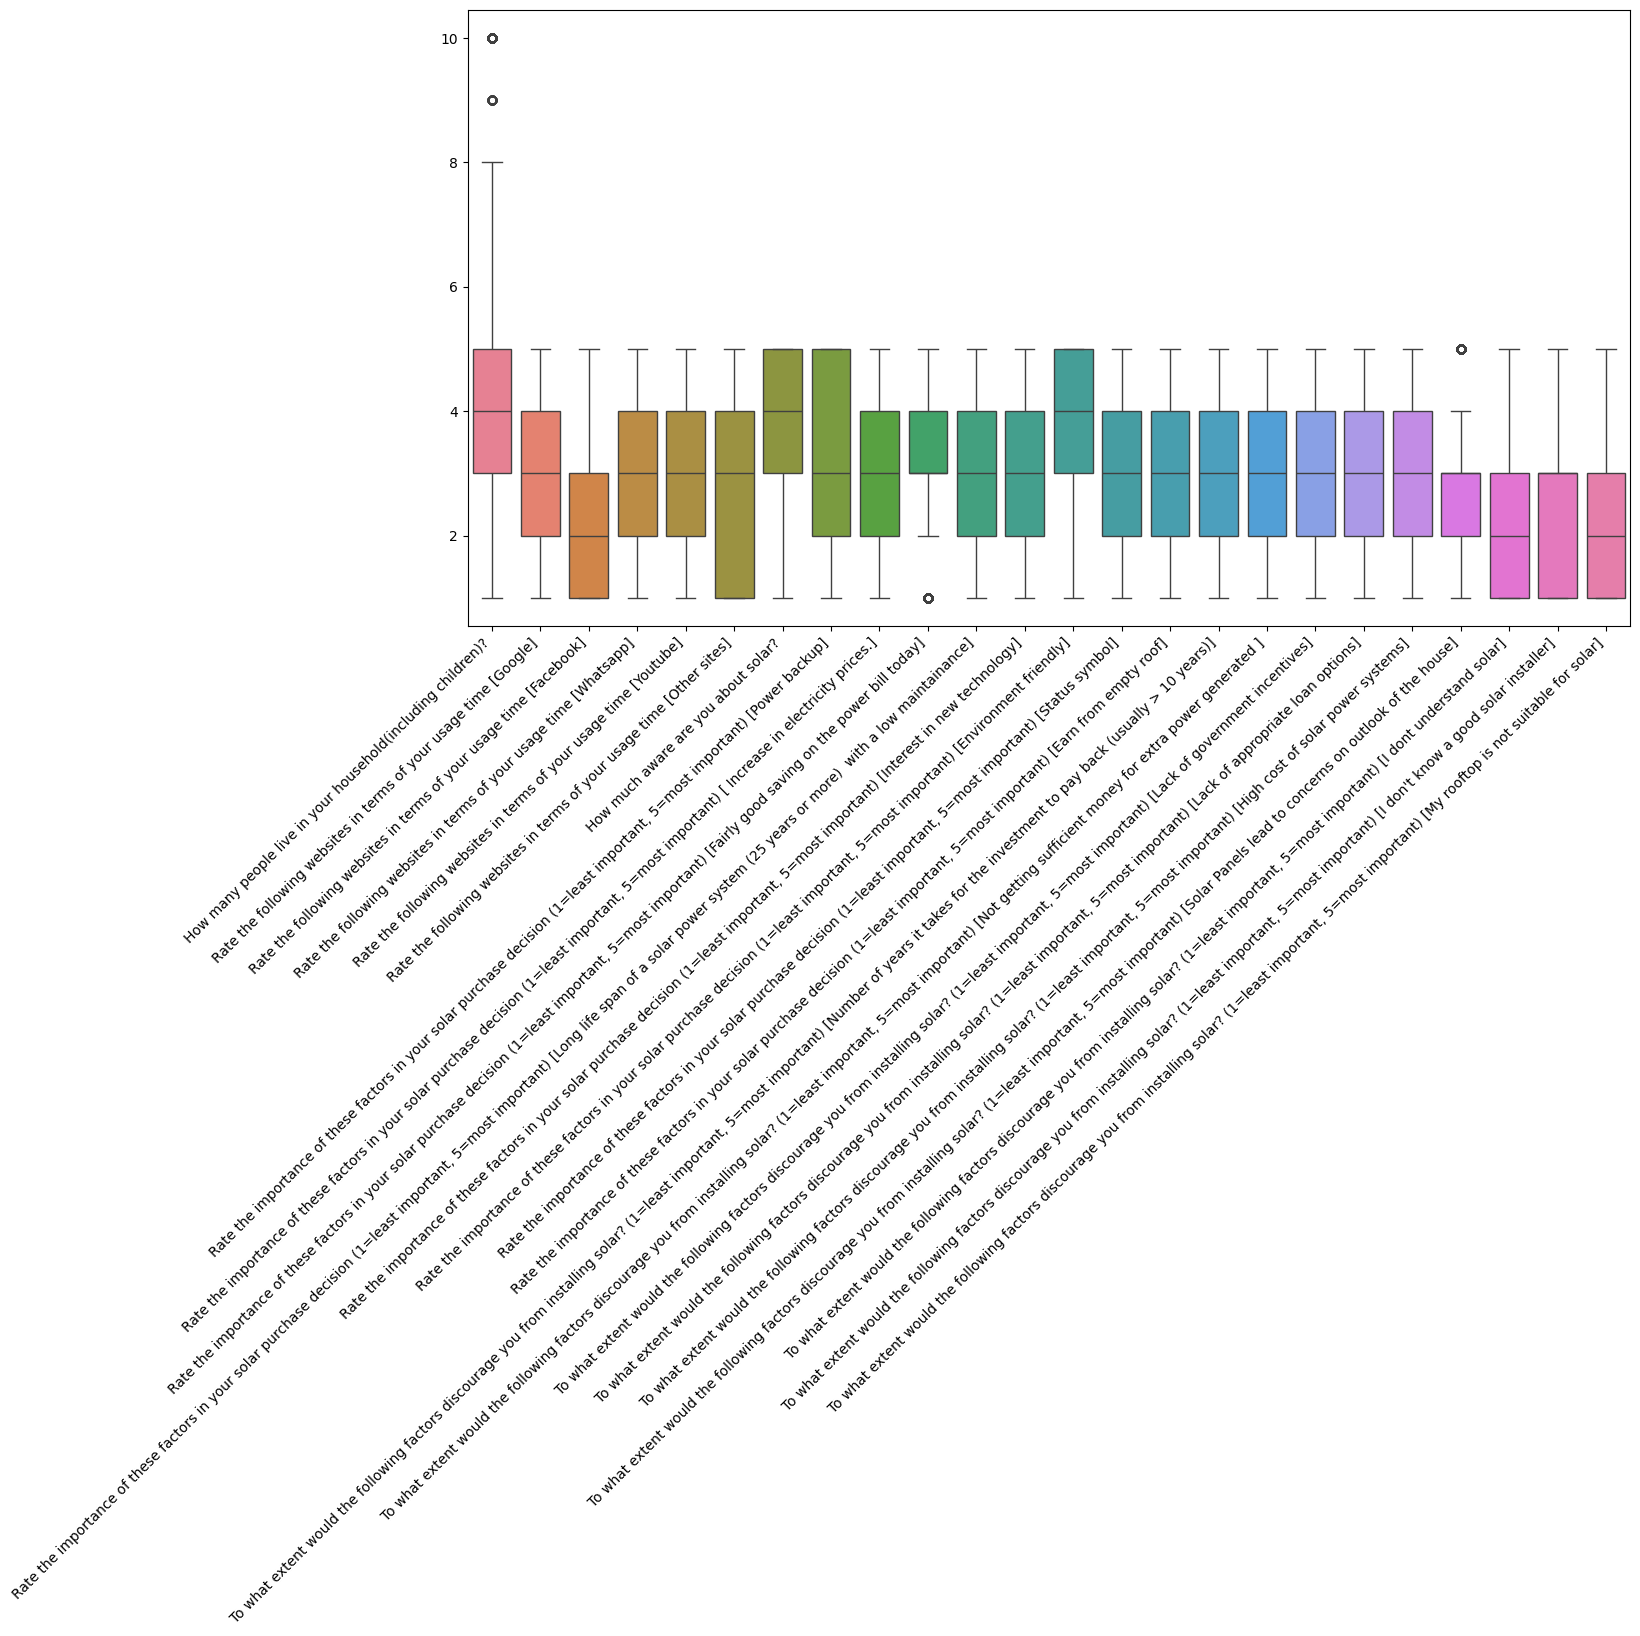

In [13]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [14]:
outliers_dict = {}
for column in df.columns:
    if df[column].dtype != 'object' and df[column].dtype != 'datetime64[ns]':
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if column not in outliers_dict and not outliers.empty:
            outliers_dict[column] = outliers.to_list() 

outliers_df = pd.DataFrame(outliers_dict.items(), columns=['col_name', 'outlier_values'])
outliers_df
        

col_name  \
0  How many people live in your household(includi...   
1  Rate the importance of these factors in your s...   
2  To what extent would the following factors dis...   

                                      outlier_values  
0  [10.0, 10.0, 10.0, 9.0, 9.0, 10.0, 10.0, 10.0,...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
2  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...

## Data Cleaning & Feature Engineering

Age

In [15]:
df['Age'].value_counts()

15-25    3011
25-35    1221
35-60     524
60+        38
14          1
121         1
99          1
74          1
Name: Age, dtype: int64

In [16]:
df['Age'] = df['Age'].apply(lambda x: '60+' if x in (74, 99, 121) else x)

In [17]:
df['Age'] = np.where(df['Age'].isin([14, '15-25']), '14-25', df['Age'] )

In [18]:
df['Age'].value_counts()

14-25    3012
25-35    1221
35-60     524
60+        41
Name: Age, dtype: int64

Marital Status

In [19]:
df['Marital Status'].value_counts()

Single                                                                                                           3909
Married                                                                                                           874
Relationship                                                                                                        2
Widowed                                                                                                             2
Student                                                                                                             2
Open relationship                                                                                                   1
Double divorce                                                                                                      1
Engaged                                                                                                             1
Proposed a girl for marriage but I dont think she will s

In [20]:
df['Marital Status'] = df['Marital Status'].apply(lambda x: 'Married' if x in ('Relationship', 'Open Relationship', 'Open relationship',
                                                                               'Engaged', 'In a Relationship'
                                                                               , 'Proposed a girl for marriage but I dont think she will say yes. Also there is a side chick.🤞hope for the best') else x)

In [21]:
df['Marital Status'] = np.where(df['Marital Status'].isin(['Student', 'Double divorce', 'Widowed ', 'Divorce',
                                                           'ZindagiJhandHai', 'Unmarried ','Nahi bolunga', 'Why should I disclose? its beyond your imagination:) ']), 
                                                           'Single', df['Marital Status'])

In [22]:
df['Marital Status'].value_counts(normalize=True, dropna=False)*100

Single     81.659025
Married    18.340975
Name: Marital Status, dtype: float64

Gender

In [23]:
df['Gender'].value_counts()

Male      3149
Female    1649
Name: Gender, dtype: int64

Additional Floor

In [24]:
df['Do you plan to build an additional floor? (If other, what does it depend on?)'].value_counts()

No                                                                                                                                                    3885
Yes                                                                                                                                                    852
Maybe                                                                                                                                                    3
May be                                                                                                                                                   2
Don't know                                                                                                                                               2
Depend on Landlord                                                                                                                                       1
.                                                                     

In [25]:
df['Do you plan to build an additional floor? (If other, what does it depend on?)'] = np.where(df['Do you plan to build an additional floor? (If other, what does it depend on?)'] == 'Yes', 1, 0)

In [26]:
df['Do you plan to build an additional floor? (If other, what does it depend on?)'].value_counts()

0    3946
1     852
Name: Do you plan to build an additional floor? (If other, what does it depend on?), dtype: int64

Electrical Appliances

In [27]:
df['What electrical appliances do you own?'].value_counts()

AC, Refrigerator, Washing Machine, TV, Computer, Water Heater    2023
Refrigerator, Washing Machine, TV, Computer, Water Heater         360
AC, Refrigerator, Washing Machine, TV, Computer                   343
AC, Refrigerator, Washing Machine, TV, Water Heater               244
Refrigerator, Washing Machine, TV, Computer                       230
TV                                                                141
Refrigerator, Washing Machine, TV                                 140
AC, Refrigerator, Washing Machine, TV                             125
Refrigerator, TV, Computer                                        111
AC                                                                 93
Refrigerator, TV                                                   92
Refrigerator                                                       78
Refrigerator, Washing Machine, TV, Water Heater                    78
Computer                                                           73
AC, Refrigerator, TV

In [28]:
unique_appliances = ['AC', 'Refrigerator', 'Washing Machine', 'TV', 'Computer', 'Water Heater']

In [29]:
for appliance in unique_appliances:
    df[appliance] = 0

# Set 1 for the corresponding appliance columns if the appliance is present in the original column
for appliance in unique_appliances:
    df[appliance] = df['What electrical appliances do you own?'].fillna('').str.contains(appliance).astype(int)

# Optionally, you can drop the original column if you no longer need it
df = df.drop('What electrical appliances do you own?', axis=1)

Type of Org

In [30]:
def organisation_uniform(x):
    x = str(x)
    x = x.lower()
    x = x.strip()
    if any(keyword in x for keyword in ('stu', 'education', 'college', 'preparing',
                                        'university', 'high', 'IIM', 'IIT', 'grad', 'studying', 'student')):
        return 'Student'
    if any(keyword in x for keyword in ('business', 'busi', 'coach', 'self-employed', 'self employed',
                                        'shop', 'buissness', 'tuition', 'tution', 'self')):
        return 'Business'
    if any(keyword in x for keyword in ('private', 'govt', 'government')):
        return 'Working Professional'
    
    if any(keyword in x for keyword in ('do not', 'doesn\'t', 'dont', 'don\'t', 'no working', 'non working'
                                        'does not', 'not', 'unemployed', 'no one')):
        return 'Unemployed'

    else:
        return 'Others'

In [31]:
df['Which type of organization do you work for?'] = df['Which type of organization do you work for?'].apply(organisation_uniform)

In [32]:
df['Which type of organization do you work for?'].value_counts(normalize=True)*100

Working Professional    59.774906
Student                 19.862443
Business                13.213839
Others                   5.418925
Unemployed               1.729887
Name: Which type of organization do you work for?, dtype: float64

Number of Floors

In [33]:
def floor_check(x):
    x = str(x)
    x = x.lower()
    x = x.strip()
    if (x in ('ground floor', '1 floor')):
        return 1
    if (x in ('2 floors', 'g+1 floor')):
        return 2
    if (x in ('3 floors', 'g+2 floors')):
        return 3
    if (x in ('g+3 floors', '4 floors')):
        return 4
    else:
        return 5


In [34]:
df['Number of Floors in House'] = df['Number of Floors in House'].apply(floor_check)

In [35]:
df['Number of Floors in House'].value_counts(dropna=False)

1    1469
2    1376
3     899
5     714
4     340
Name: Number of Floors in House, dtype: int64

Dependents or family members

In [36]:
df['How many people live in your household(including children)?'].value_counts()

4.0     1661
5.0      875
3.0      755
6.0      391
2.0      338
10.0     273
7.0      172
8.0      136
1.0      109
9.0       87
Name: How many people live in your household(including children)?, dtype: int64

City and States Targeted

In [37]:
cities_state_data = json.load(open('Indian_Cities_In_States_JSON.json', 'r'))
cities_state_data

{'Andaman and Nicobar Islands': ['Port Blair'],
 'Haryana': ['Faridabad',
  'Gurgaon',
  'Hisar',
  'Rohtak',
  'Panipat',
  'Karnal',
  'Sonipat',
  'Yamunanagar',
  'Panchkula',
  'Bhiwani',
  'Bahadurgarh',
  'Jind',
  'Sirsa',
  'Thanesar',
  'Kaithal',
  'Palwal',
  'Rewari',
  'Hansi',
  'Narnaul',
  'Fatehabad',
  'Gohana',
  'Tohana',
  'Narwana',
  'Mandi Dabwali',
  'Charkhi Dadri',
  'Shahbad',
  'Pehowa',
  'Samalkha',
  'Pinjore',
  'Ladwa',
  'Sohna',
  'Safidon',
  'Taraori',
  'Mahendragarh',
  'Ratia',
  'Rania',
  'Sarsod'],
 'Tamil Nadu': ['Chennai',
  'Coimbatore',
  'Madurai',
  'Tiruchirappalli',
  'Salem',
  'Tirunelveli',
  'Tiruppur',
  'Ranipet',
  'Nagercoil',
  'Thanjavur',
  'Vellore',
  'Kancheepuram',
  'Erode',
  'Tiruvannamalai',
  'Pollachi',
  'Rajapalayam',
  'Sivakasi',
  'Pudukkottai',
  'Neyveli (TS)',
  'Nagapattinam',
  'Viluppuram',
  'Tiruchengode',
  'Vaniyambadi',
  'Theni Allinagaram',
  'Udhagamandalam',
  'Aruppukkottai',
  'Paramakudi',


In [38]:
def city_state_mapper(city):
    city  = str(city)
    city = city.capitalize()
    city = city.strip()
    
    for state, cities in cities_state_data.items():
        if city in cities:
            return state
    return 'Unavailable'

In [39]:
df['Which city is your house at?'] = df['Which city is your house at?'].apply(city_state_mapper)

In [40]:
df['Which city is your house at?'].value_counts()

Unavailable          1596
Maharashtra           425
Uttar Pradesh         406
Delhi                 296
Haryana               244
Gujarat               232
Odisha                226
Telangana             191
Madhya Pradesh        177
West Bengal           157
Bihar                 146
Assam                 120
Andhra Pradesh        110
Punjab                 70
Rajasthan              66
Tamil Nadu             60
Jharkhand              54
Uttarakhand            54
Karnataka              49
Chhattisgarh           27
Kerala                 27
Chandigarh             23
Himachal Pradesh       19
Tripura                 7
Jammu and Kashmir       3
Himachal Praddesh       3
Puducherry              3
Goa                     2
Manipur                 2
Meghalaya               2
Nagaland                1
Name: Which city is your house at?, dtype: int64

In [41]:
intensity_data = dict(df['Which city is your house at?'].value_counts())
intensity_data

{'Unavailable': 1596,
 'Maharashtra': 425,
 'Uttar Pradesh': 406,
 'Delhi': 296,
 'Haryana': 244,
 'Gujarat': 232,
 'Odisha': 226,
 'Telangana': 191,
 'Madhya Pradesh': 177,
 'West Bengal': 157,
 'Bihar': 146,
 'Assam': 120,
 'Andhra Pradesh': 110,
 'Punjab': 70,
 'Rajasthan': 66,
 'Tamil Nadu': 60,
 'Jharkhand': 54,
 'Uttarakhand': 54,
 'Karnataka': 49,
 'Chhattisgarh': 27,
 'Kerala': 27,
 'Chandigarh': 23,
 'Himachal Pradesh': 19,
 'Tripura': 7,
 'Jammu and Kashmir': 3,
 'Himachal Praddesh': 3,
 'Puducherry': 3,
 'Goa': 2,
 'Manipur': 2,
 'Meghalaya': 2,
 'Nagaland': 1}

Payment Method

In [42]:
df['Which payment method do you use the most?'].unique()

array(['Debit card, Online(Paytm, BHIM etc.)',
       'Cash, Debit card, Online(Paytm, BHIM etc.)', 'Cash', 'Debit card',
       'Cash, Debit card, Credit card, Online(Paytm, BHIM etc.)',
       'Cash, Debit card', 'Online(Paytm, BHIM etc.)',
       'Cash, Credit card', 'Credit card',
       'Cash, Online(Paytm, BHIM etc.)',
       'Debit card, Credit card, Online(Paytm, BHIM etc.)',
       'Cash, Debit card, Credit card', 'Debit card, Credit card',
       'Credit card, Online(Paytm, BHIM etc.)',
       'Cash, Credit card, Online(Paytm, BHIM etc.)'], dtype=object)

In [43]:
def create_plastic_money_flag(x):
    for element in x:
        if 'card' in element:
            return 1
    return 0

In [44]:
def create_cash_pmt_flag(x):
    if 'Cash' in x:
        return 1
    return 0

In [45]:
df['plastic_money_flag'] = df['Which payment method do you use the most?'].str.split().apply(create_plastic_money_flag)
df['plastic_money_flag']

0       1
1       1
2       0
3       1
4       1
       ..
4793    1
4794    1
4795    1
4796    0
4797    1
Name: plastic_money_flag, Length: 4798, dtype: int64

In [46]:
df['cash_pmt_flag'] = df['Which payment method do you use the most?'].str.split(',').apply(create_cash_pmt_flag)
df['cash_pmt_flag']

0       0
1       1
2       1
3       1
4       0
       ..
4793    0
4794    1
4795    1
4796    0
4797    0
Name: cash_pmt_flag, Length: 4798, dtype: int64

In [47]:
df['cash_pmt_flag'].value_counts()

1    2708
0    2090
Name: cash_pmt_flag, dtype: int64

In [48]:
df['Which payment method do you use the most?'].str.split(',')

0              [Debit card,  Online(Paytm,  BHIM etc.)]
1       [Cash,  Debit card,  Online(Paytm,  BHIM etc.)]
2                                                [Cash]
3       [Cash,  Debit card,  Online(Paytm,  BHIM etc.)]
4                                          [Debit card]
                             ...                       
4793                                       [Debit card]
4794    [Cash,  Debit card,  Online(Paytm,  BHIM etc.)]
4795    [Cash,  Debit card,  Online(Paytm,  BHIM etc.)]
4796                        [Online(Paytm,  BHIM etc.)]
4797                                       [Debit card]
Name: Which payment method do you use the most?, Length: 4798, dtype: object

In [49]:
df['online_pmt_flag'] = df['Which payment method do you use the most?'].str.contains('online', case=False).astype(int)
df['online_pmt_flag']

0       1
1       1
2       0
3       1
4       0
       ..
4793    0
4794    1
4795    1
4796    1
4797    0
Name: online_pmt_flag, Length: 4798, dtype: int64

Power Backup

In [50]:
df['What Power Backup do you use?'].unique()

array(['Diesel Generator', 'No Backup', 'Inverter',
       'Diesel Generator, Inverter', 'Inverter, No Backup',
       'Solar, Inverter', 'Solar', 'Other', 'Diesel Generator, Solar',
       'No Backup, We prefer to live in dark, we are vampires.',
       'Diesel Generator, Solar, Inverter, No Backup', 'None ',
       'Solar, No Backup', 'Diesel Generator, Solar, Inverter',
       'Candle, Rechargable emergency light',
       'Solar, Inverter, No Backup', 'Society power back up',
       'Two connections', 'Nai batana ', 'H',
       "Light doesn't go in our area ", 'Diesel Generator, No Backup',
       'Candles', 'Diesel Generator, Inverter, No Backup', 'No',
       'JA solar', 'no idea', 'Society generator',
       'Hindalco provides electricity 24*7', 'Genset',
       'Backup not required', 'Generator backed up for the society',
       'Inverter, Power house', 'Diesel Generator, Solar, No Backup',
       'Solar, Inverter, Converter',
       "Apartment' as a whole has a Diesel Generator

In [51]:
df['What Power Backup do you use?'] = np.where(df['What Power Backup do you use?'].str.contains('solar', case=False), 1, 0)
df['What Power Backup do you use?']

0       0
1       0
2       0
3       0
4       0
       ..
4793    0
4794    0
4795    0
4796    0
4797    0
Name: What Power Backup do you use?, Length: 4798, dtype: int64

In [52]:
df['What Power Backup do you use?'].value_counts()

0    4535
1     263
Name: What Power Backup do you use?, dtype: int64

In [53]:
df.rename({'What Power Backup do you use?': 'solar_powerbackup_flag'})

Full name    Age Marital Status  Gender  \
0         sweta singh  14-25         Single  Female   
1           Ajay Babu  14-25         Single    Male   
2       Ajumal Khan A  14-25         Single    Male   
3     Navya Venugopal  14-25         Single  Female   
4       Harshal Maske  25-35         Single  Female   
...               ...    ...            ...     ...   
4793    S N J Aparna   25-35         Single  Female   
4794     Shubham Paul  25-35         Single    Male   
4795    S N J Aparna   25-35         Single  Female   
4796           Adithi  25-35        Married  Female   
4797    Sonal Ambokar  25-35        Married  Female   

     Which type of organization do you work for? Name of Profession  \
0                           Working Professional                 hr   
1                           Working Professional          Logistics   
2                                       Business      Self Employed   
3                                         Others      social worker   
4                                        Student               MBA    
...                                          ...                ...   
4793                        Working Professional           Engineer   
4794                        Working Professional            Defence   
4795                        Working Professional           Engineer   
4796                        Working Professional           Engineer   
4797                        Working Professional         Accountant   

     What is the type of home that you own?  Number of Floors in House  \
0                             Flat(On Rent)                          5   
1                Independent house or Villa                          1   
2                Independent house or Villa                          2   
3                             Flat(On Rent)                          3   
4                         Apartment or Flat                          1   
...                                     ...                        ...   
4793                     Government Quarter                          2   
4794             Independent house or Villa                          2   
4795                    Government Quarter                           2   
4796                          Flat(On Rent)                          5   
4797                      Apartment or Flat                          5   

      How many people live in your household(including children)?  \
0                                                   NaN             
1                                                   5.0             
2                                                   5.0             
3                                                   3.0             
4                                                   4.0             
...                                                 ...             
4793                                                3.0             
4794                                                4.0             
4795                                                3.0             
4796                                                3.0             
4797                                                6.0             

     No of Rooms in your house  ...  What are your computer brands? AC  \
0                            3  ...                             NaN  0   
1                            4  ...                             NaN  0   
2                            4  ...                             NaN  1   
3                            1  ...                             NaN  1   
4                            4  ...                             NaN  1   
...                        ...  ...                             ... ..   
4793                        5+  ...                            Dell  1   
4794                         4  ...                            Dell  1   
4795                        5+  ...                            Dell  1   
4796                        5+  ...     

In [54]:
df.describe()

Number of Floors in House  \
count                4798.000000   
mean                    2.469362   
std                     1.377096   
min                     1.000000   
25%                     1.000000   
50%                     2.000000   
75%                     3.000000   
max                     5.000000   

       How many people live in your household(including children)?  \
count                                        4797.000000             
mean                                            4.632062             
std                                             2.007990             
min                                             1.000000             
25%                                             3.000000             
50%                                             4.000000             
75%                                             5.000000             
max                                            10.000000             

       Do you plan to build an additional floor? (If other, what does it depend on?)  \
count                                        4798.000000                               
mean                                            0.177574                               
std                                             0.382194                               
min                                             0.000000                               
25%                                             0.000000                               
50%                                             0.000000                               
75%                                             0.000000                               
max                                             1.000000                               

       Rate the following websites in terms of your usage time [Google]  \
count                                        4798.000000                  
mean                                            2.979158                  
std                                             1.419357                  
min                                             1.000000                  
25%                                             2.000000                  
50%                                             3.000000                  
75%                                             4.000000                  
max                                             5.000000                  

       Rate the following websites in terms of your usage time [Facebook]  \
count                                        4798.000000                    
mean                                            2.399750                    
std                                             1.282268                    
min                                             1.000000                    
25%                                             1.000000                    
50%                                             2.000000                    
75%                                             3.000000                    
max                                             5.000000                    

       Rate the following websites in terms of your usage time [Whatsapp]  \
count                                        4798.000000                    
mean                                            2.954981                    
std                                             1.357679                    
min                                             1.000000                    
25%                                             2.000000                    
50%                                             3.000000                    
75%                                             4.000000                    
max                                             5.000000                    

       Rate the following websites in terms of your usage time [Youtube]  \
count                                        4798.000000                   
mean                                      

#### Dropping olumns not being used for analysis

In [55]:
not_included_cols = [
    'Name of Profession', 'What is the type of home that you own?', 'Plot size of the house (In Square yards)',
    'Which payment method do you use the most?', 'What is the next appliance you want to buy?',
    'Name the Solar company you know', 'Who owns the house you live in?', 'What are your computer brands?'
]

df = df.drop(columns=not_included_cols)

## Univariate Analysis

Separating Categorical and Numerical Features

In [56]:
categorical_feats = [col for col in df.columns if df[col].dtypes != 'float64' and df[col].dtypes != 'int64' and df[col].dtypes != 'datetime64[ns]']

In [57]:
categorical_feats = categorical_feats[1:]

In [58]:
categorical_feats

['Age',
 'Marital Status',
 'Gender',
 'Which type of organization do you work for?',
 'No of Rooms in your house',
 'What percentage of your roof are you ready to give for solar?',
 'Do you have a home loan?',
 'How many of the below vehicles do you own? [2-Wheelers]',
 'How many of the below vehicles do you own? [4-Wheelers]',
 'Do you currently have an EMI for any home appliance?',
 "What is the range of your family's average monthly earnings?",
 'What are your appliances brands?  [AC]',
 'What are your appliances brands?  [Refrigerator]',
 'What are your appliances brands?  [Computer]',
 'What are your appliances brands?  [TV]',
 'What are your appliances brands?  [Water Heater]',
 'What are your appliances brands?  [Washing Machine]',
 'How much do you expect to at least save on your average electricity bill by installing a solar panel system?',
 'What maximum investment would you be willing to make in solar?',
 'Which one would you prefer?',
 'Which one would you prefer ?',
 'Do 

In [59]:
remove_cat_feats = ['Name of Profession',
                    'What is the type of home that you own?', 'Plot size of the house (In Square yards)', 'What is the next appliance you want to buy?',
                    'What are your computer brands?']
categorical_feats_filtered = set(categorical_feats) - set(remove_cat_feats)

In [60]:
numerical_feats = set(df.columns) - set(categorical_feats)
numerical_feats = list(numerical_feats)

In [61]:
numerical_feats

['To what extent would the following factors discourage you from installing solar? (1=least important, 5=most important) [Lack of government incentives]',
 'To what extent would the following factors discourage you from installing solar? (1=least important, 5=most important) [Solar Panels lead to concerns on outlook of the house]',
 'online_pmt_flag',
 'Number of Floors in House',
 'Rate the following websites in terms of your usage time [Google]',
 'How much aware are you about solar?',
 'Rate the following websites in terms of your usage time [Whatsapp]',
 'Full name',
 'Do you plan to build an additional floor? (If other, what does it depend on?)',
 'Rate the following websites in terms of your usage time [Youtube]',
 'TV',
 'AC',
 'Rate the importance of these factors in your solar purchase decision (1=least important, 5=most important) [Fairly good saving on the power bill today]',
 'Rate the importance of these factors in your solar purchase decision (1=least important, 5=most im

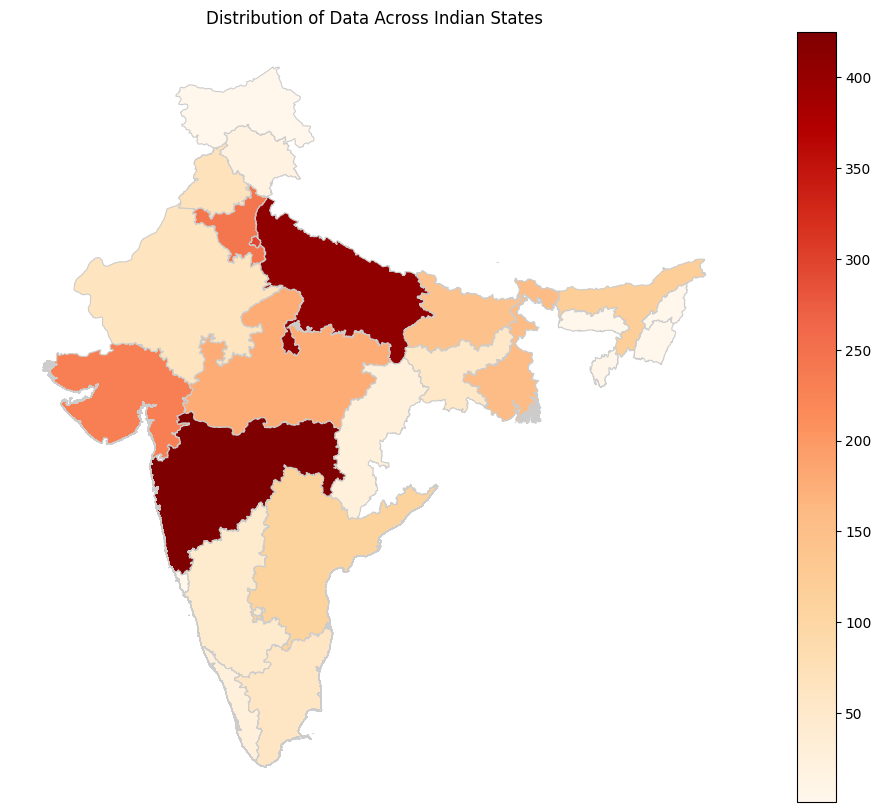

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have a GeoJSON file for Indian states, you can read it using GeoPandas
india_map = gpd.read_file('india_state_geo.json')

# Your data
data = {'Unavailable': 1596, 'Maharashtra': 425, 'Uttar Pradesh': 406, 'Delhi': 296, 'Haryana': 244, 'Gujarat': 232, 'Odisha': 226, 'Telangana': 191, 'Madhya Pradesh': 177, 'West Bengal': 157, 'Bihar': 146, 'Assam': 120, 'Andhra Pradesh': 110, 'Punjab': 70, 'Rajasthan': 66, 'Tamil Nadu': 60, 'Jharkhand': 54, 'Uttarakhand': 54, 'Karnataka': 49, 'Chhattisgarh': 27, 'Kerala': 27, 'Chandigarh': 23, 'Himachal Pradesh': 19, 'Tripura': 7, 'Jammu and Kashmir': 3, 'Puducherry': 3, 'Goa': 2, 'Manipur': 2, 'Meghalaya': 2, 'Nagaland': 1}

# Convert data to a Pandas DataFrame
df_states_city = pd.DataFrame(list(intensity_data.items()), columns=['State', 'Count'])

# Merge the map with your data
merged = india_map.set_index('NAME_1').join(df_states_city.set_index('State'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Distribution of Data Across Indian States')

# for idx, row in merged.iterrows():
#     ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, str(idx), fontsize=8, ha='center')

ax.set_axis_off()
plt.show()


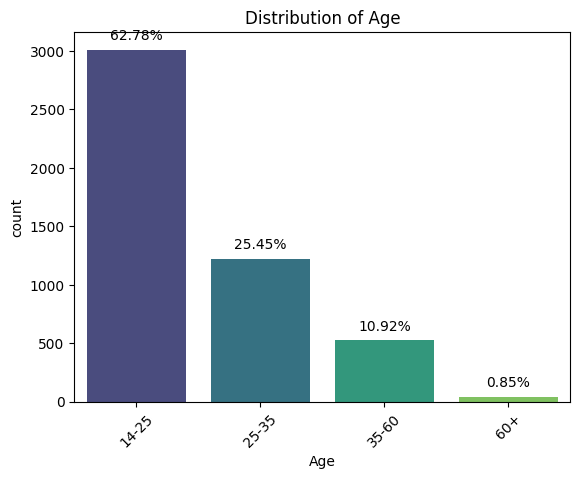

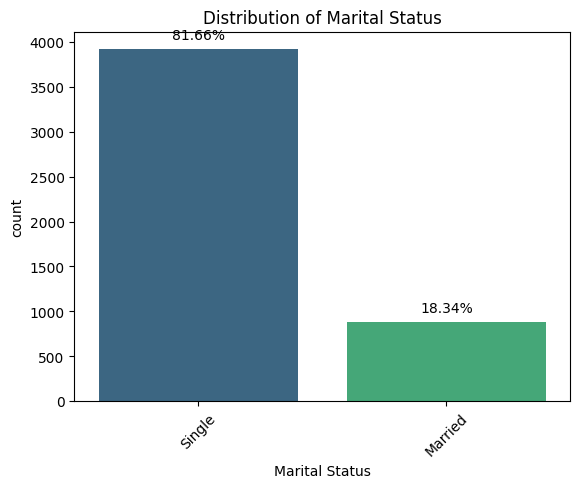

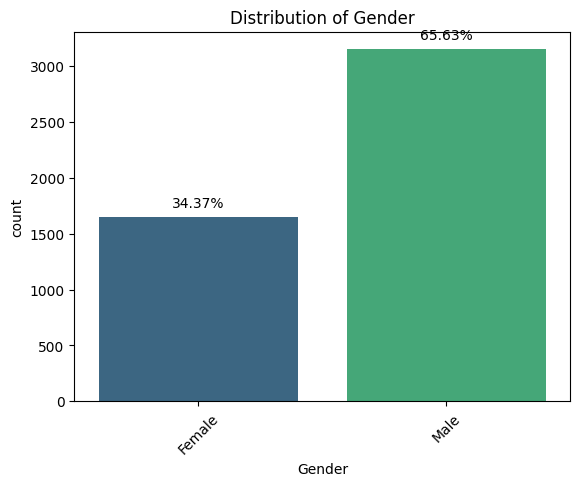

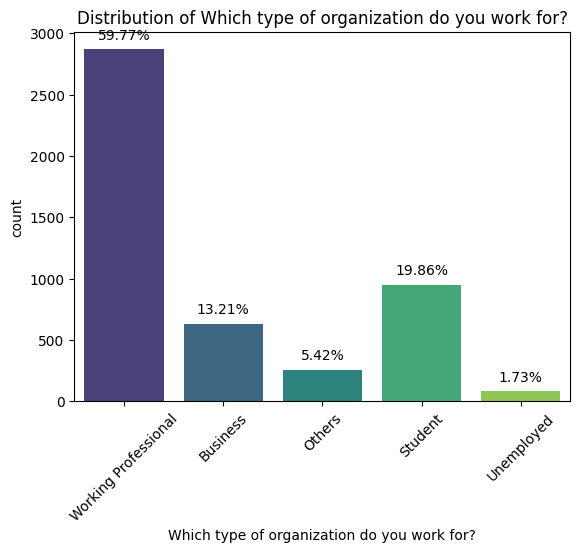

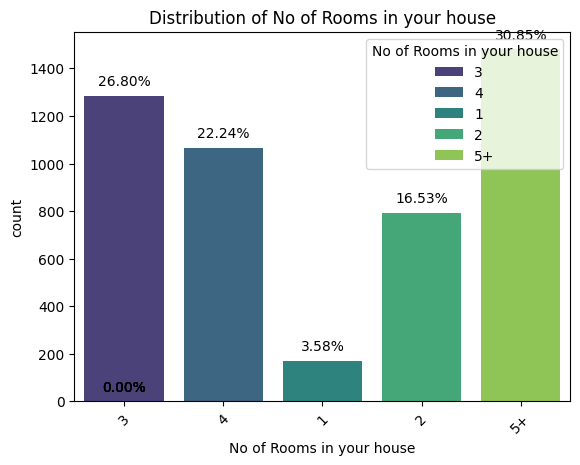

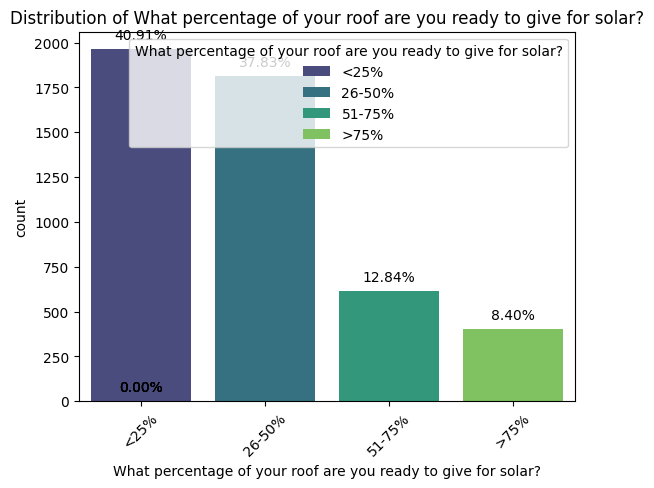

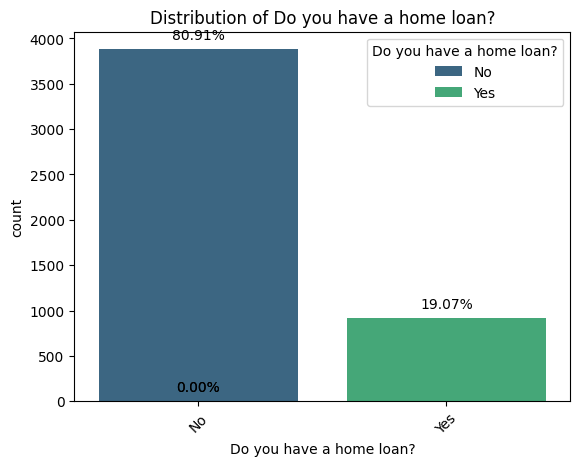

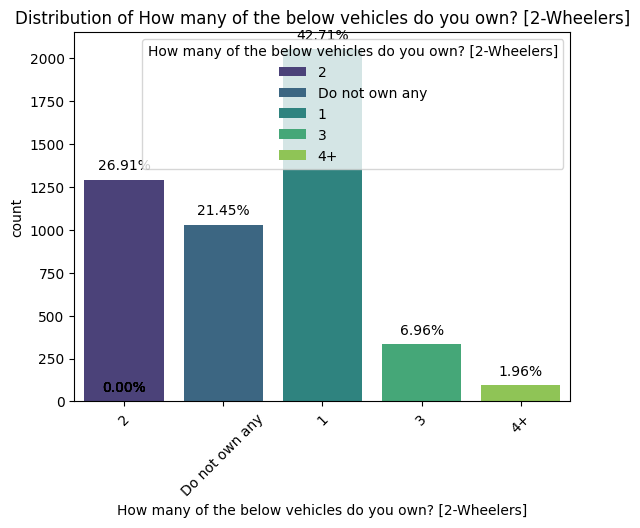

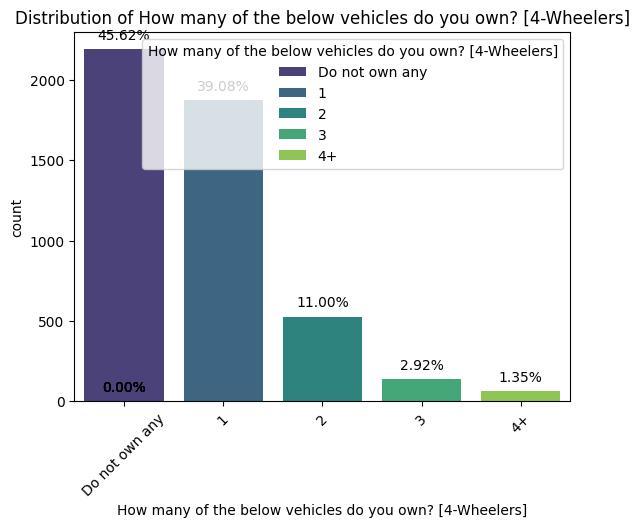

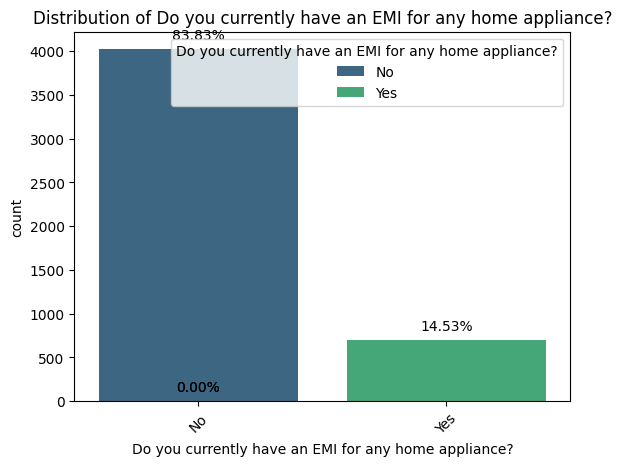

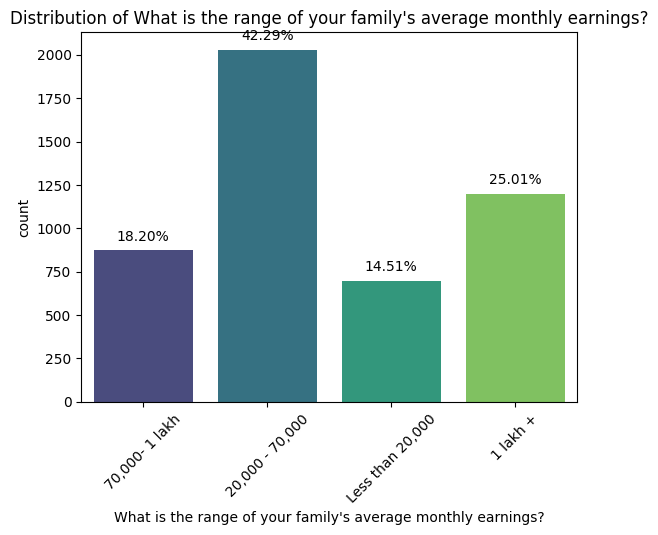

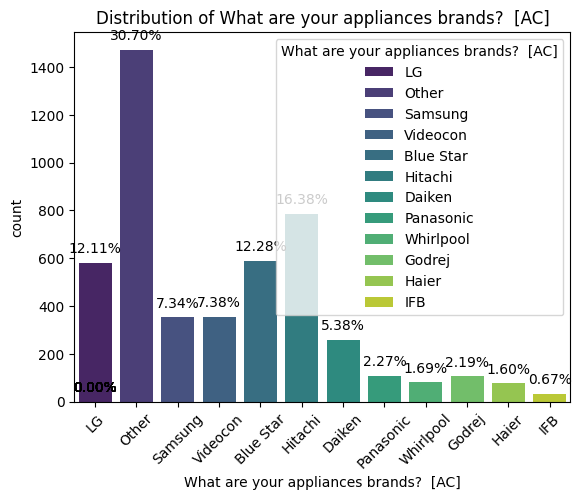

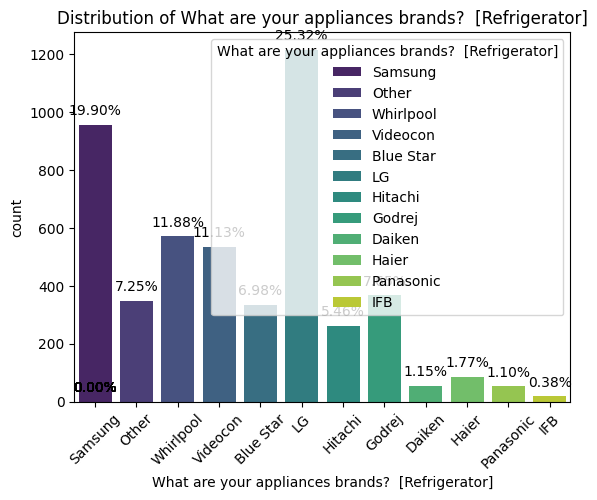

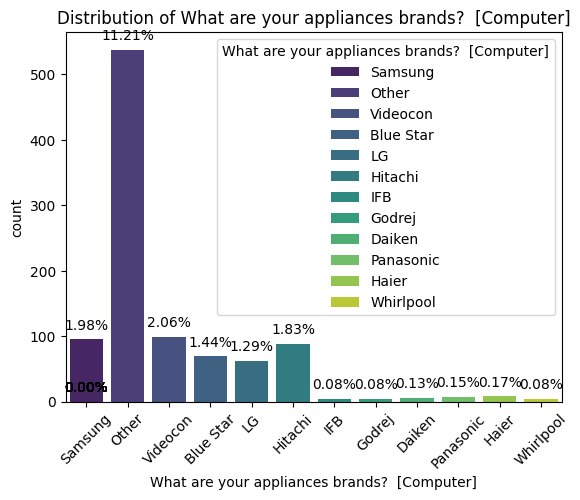

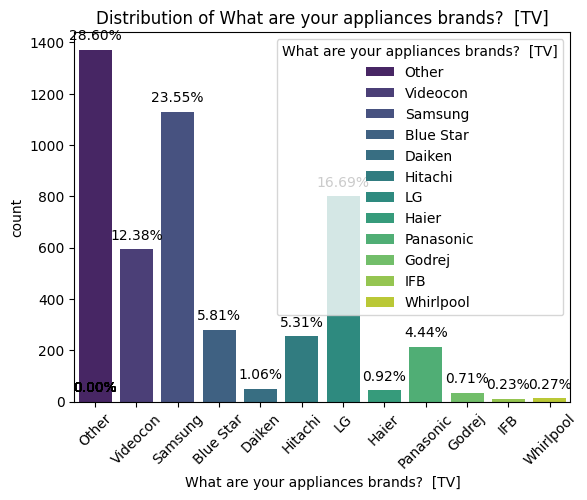

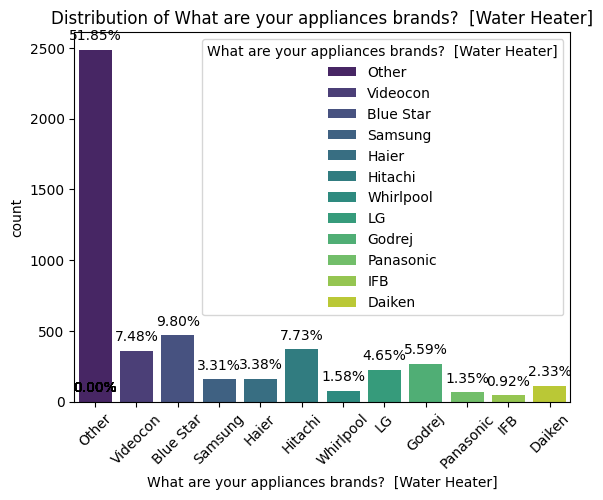

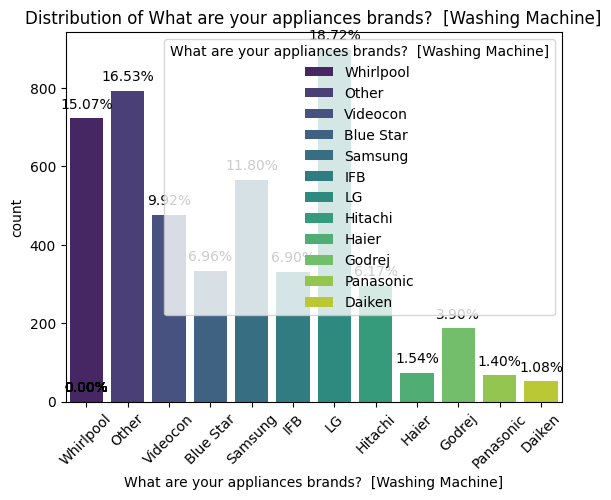

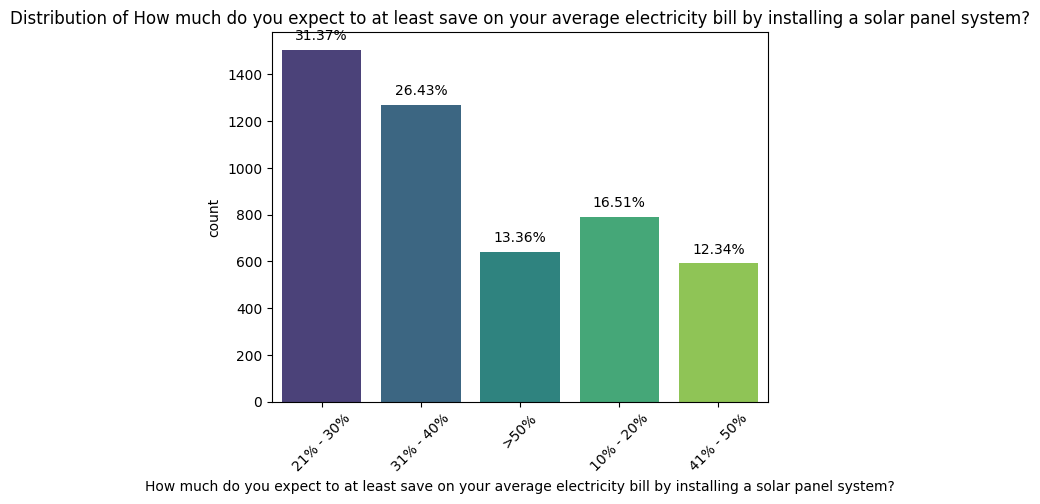

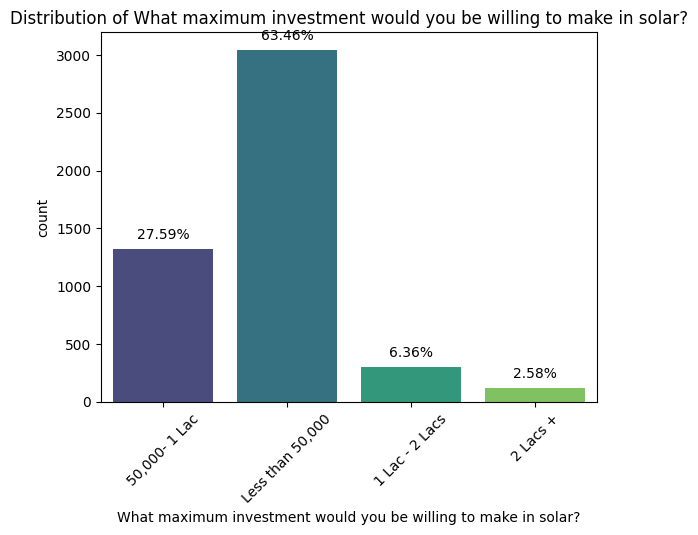

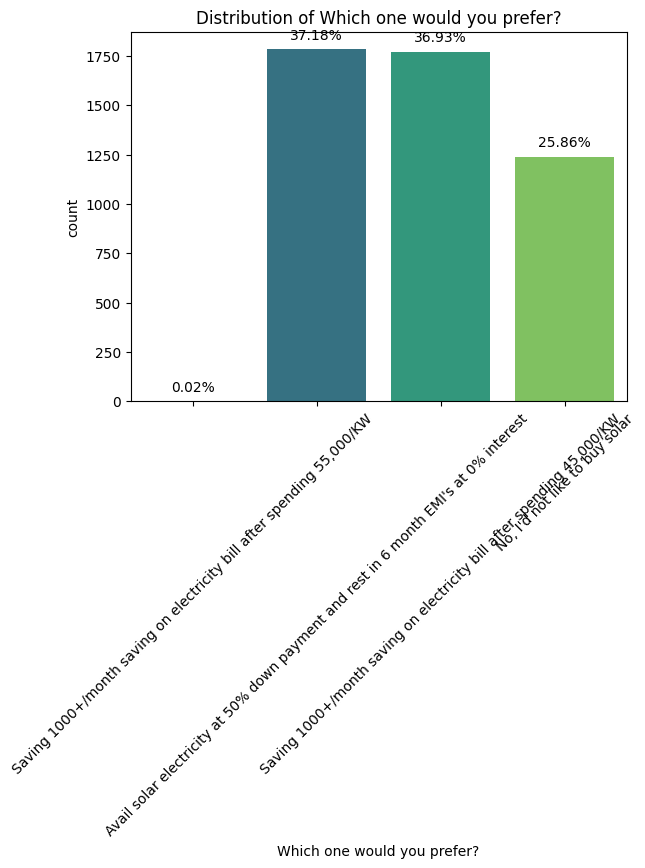

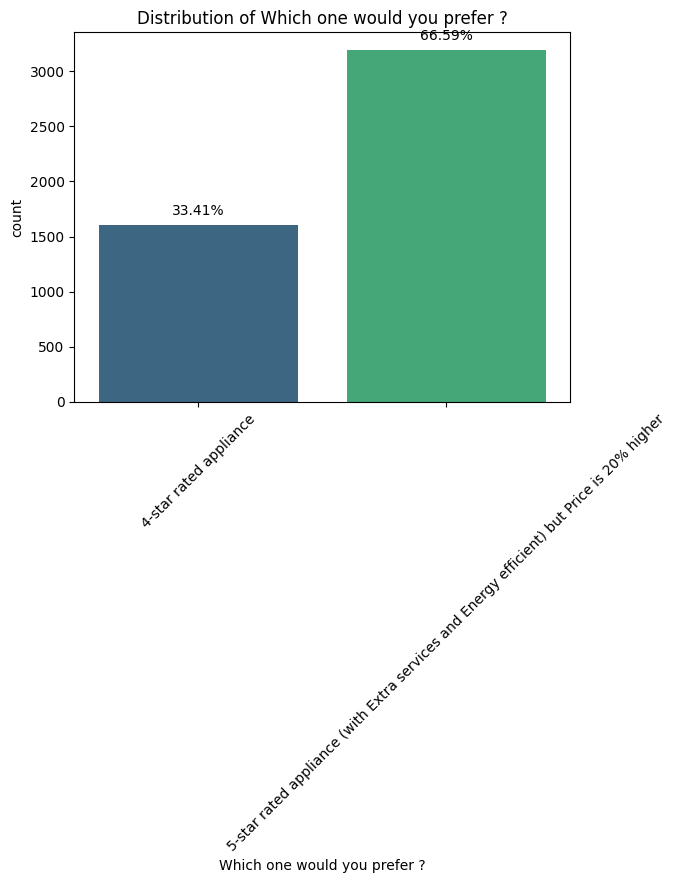

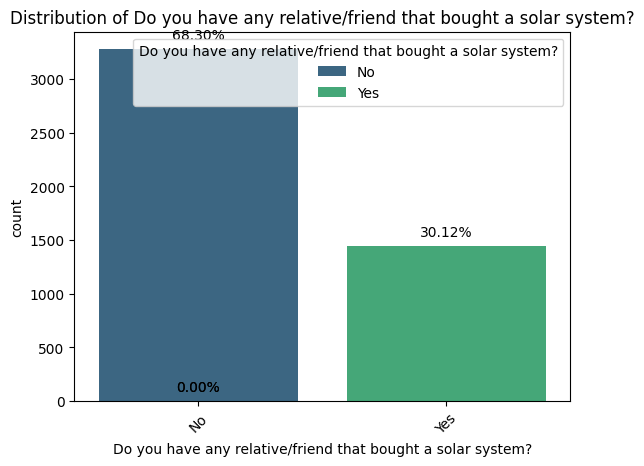

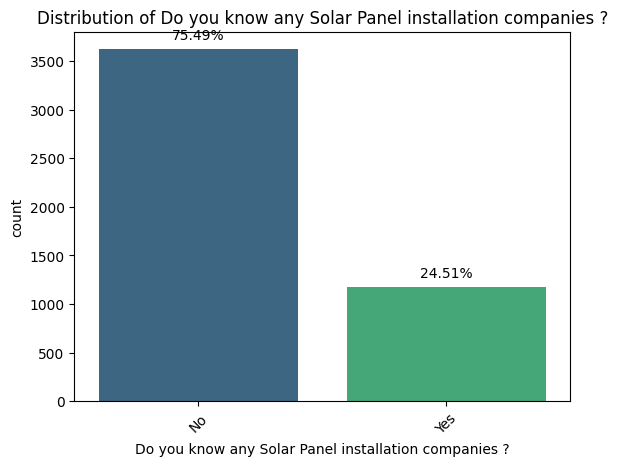

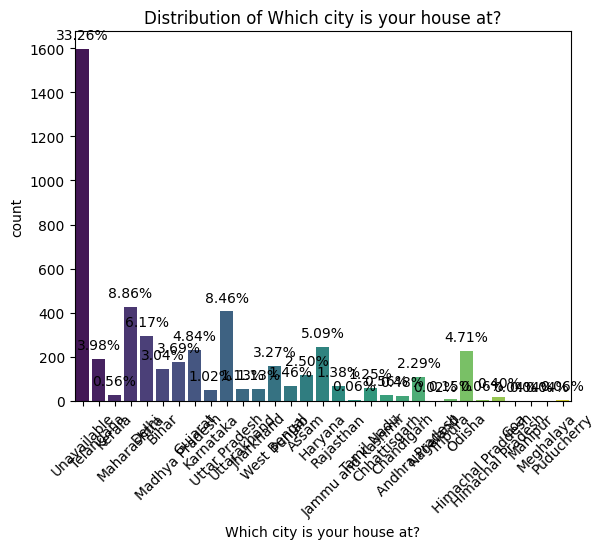

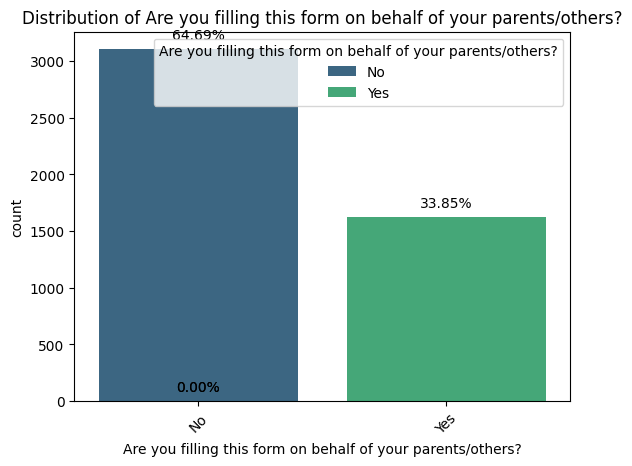

In [63]:
for col in categorical_feats:  
    # Plot countplot
    ax = sns.countplot(x=col, hue=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
    # Add percentage annotations on top of each bar
    total_count = len(df[col])
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()

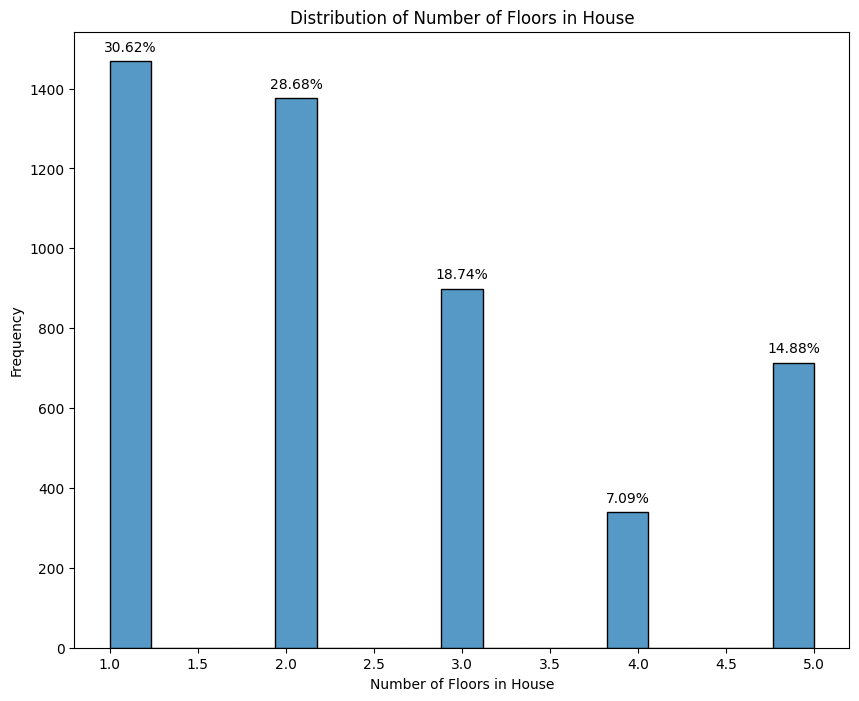

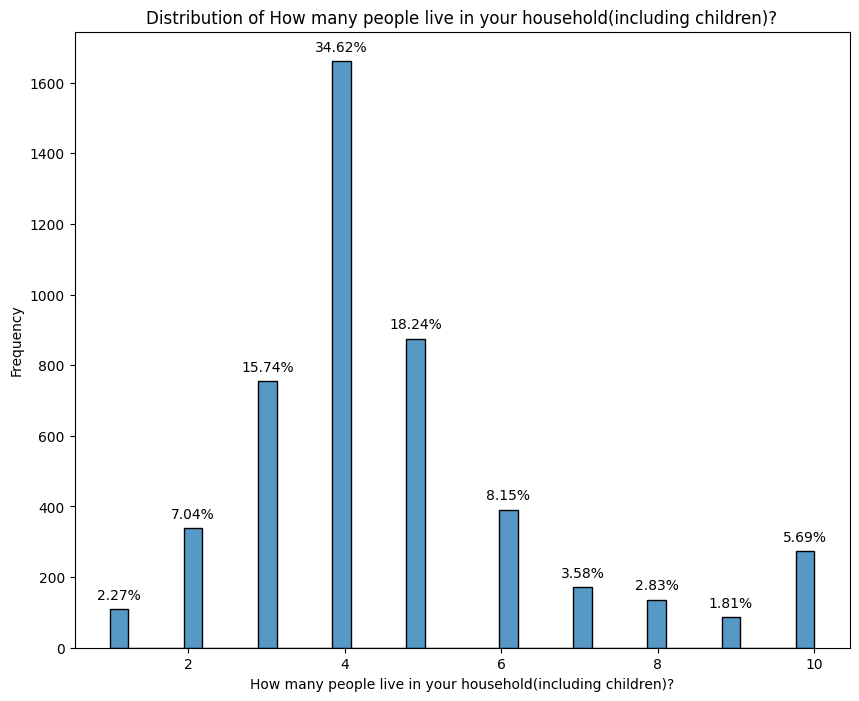

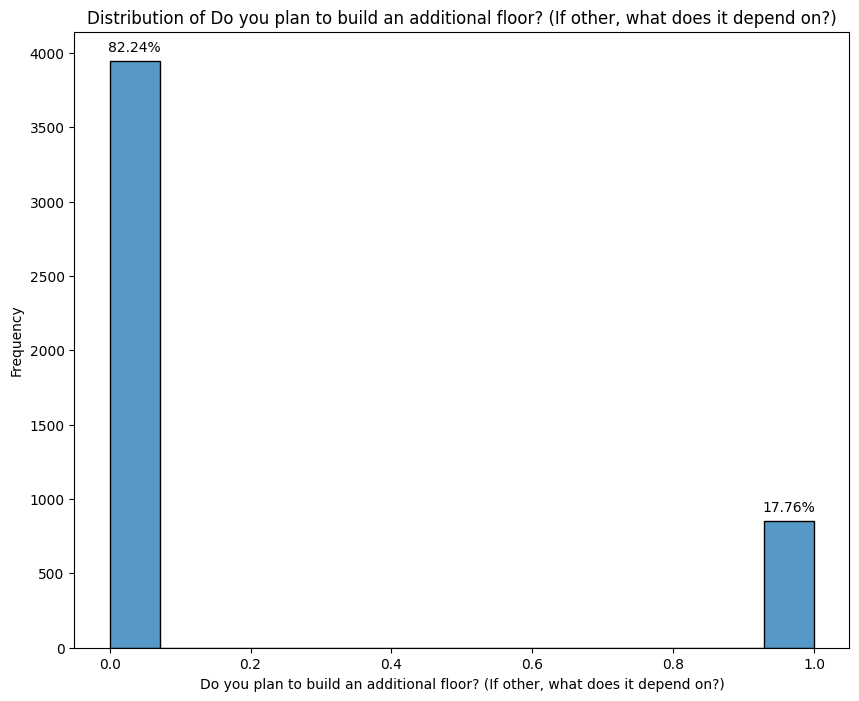

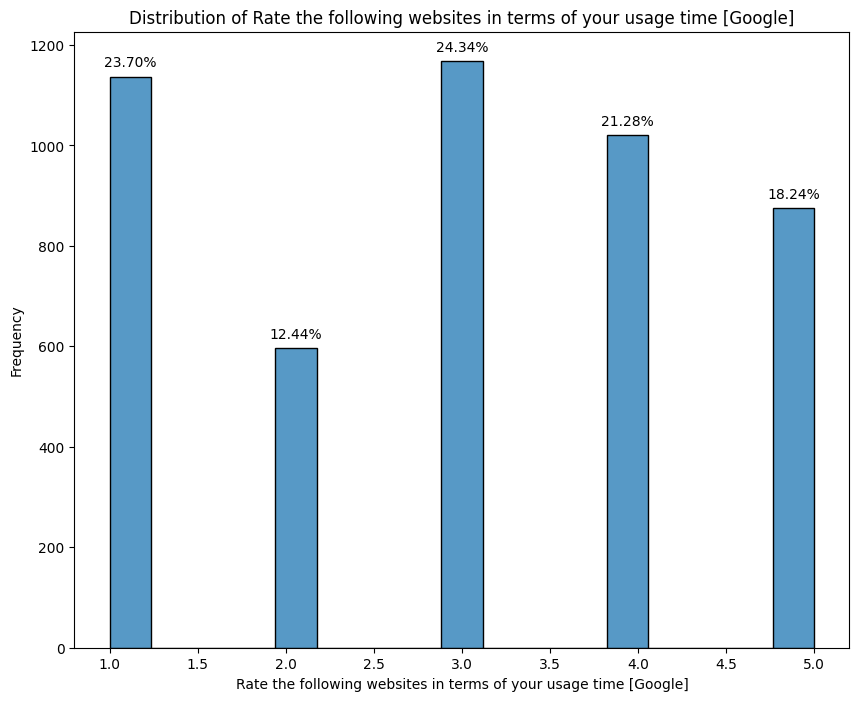

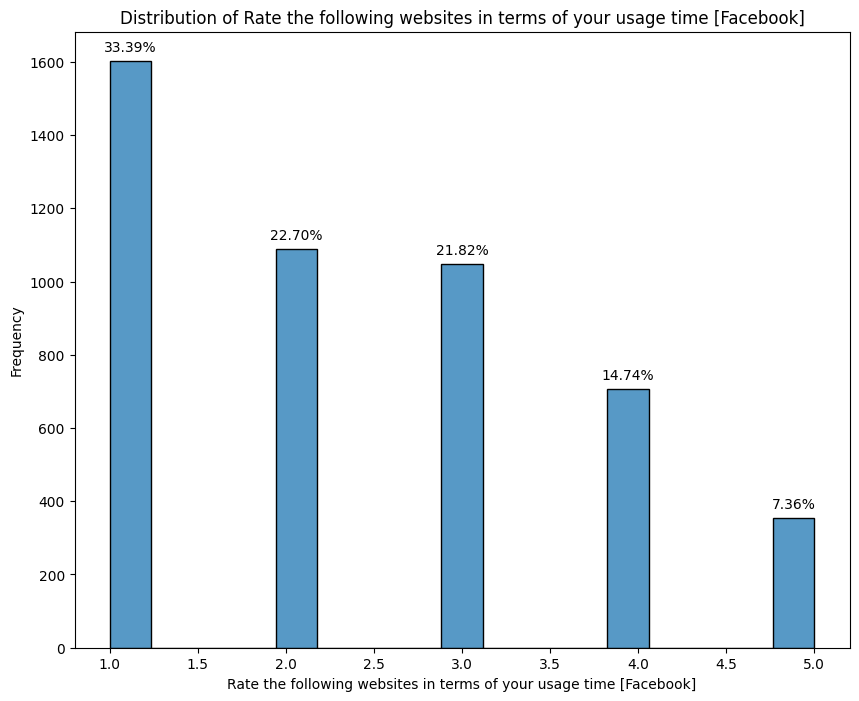

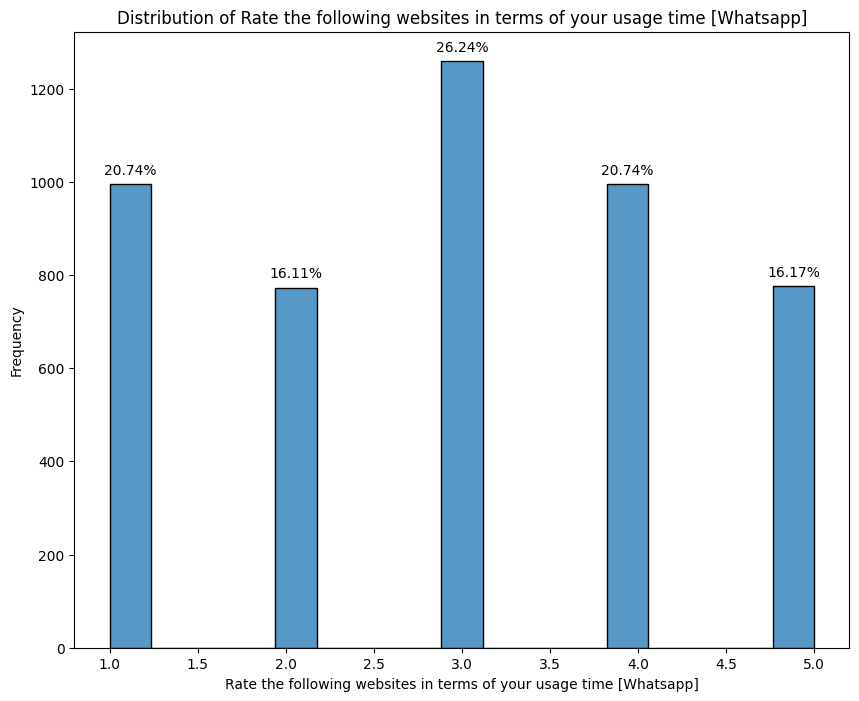

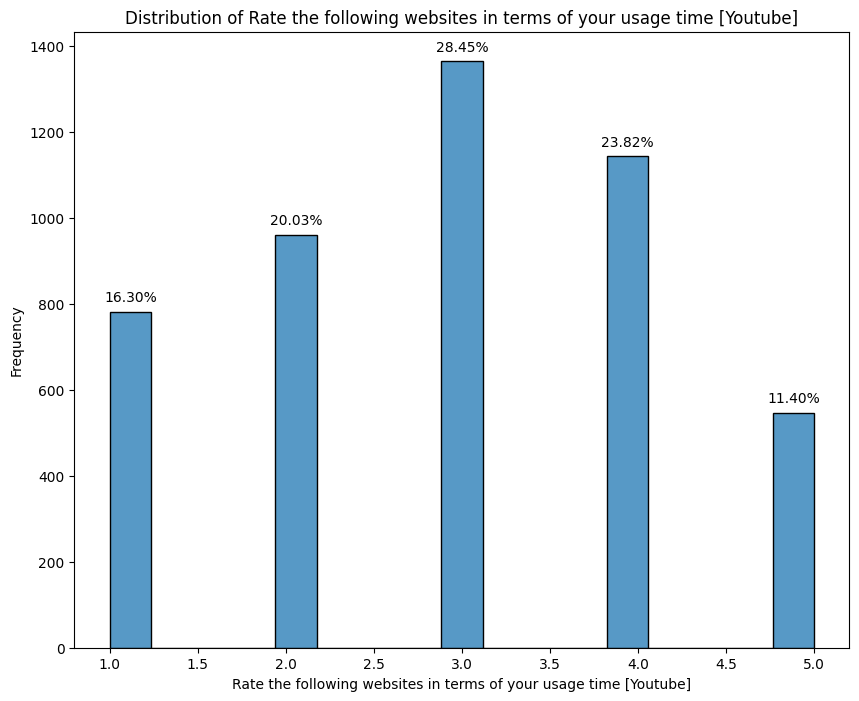

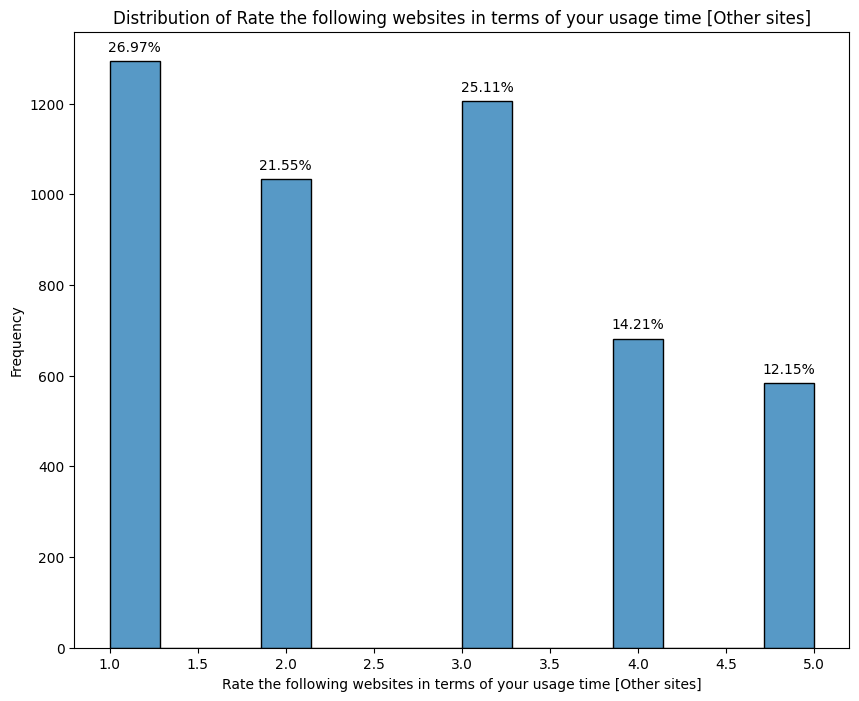

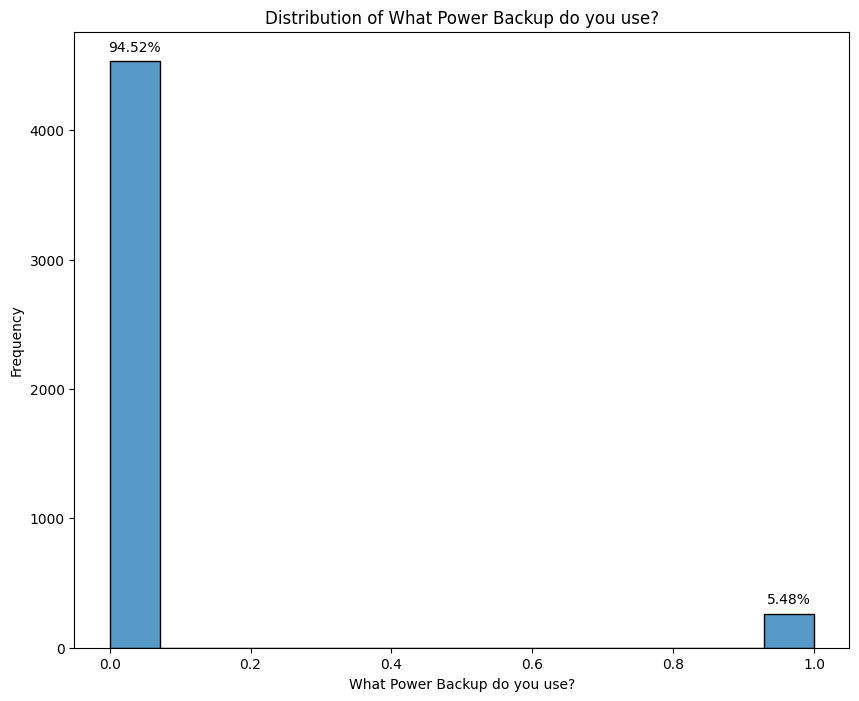

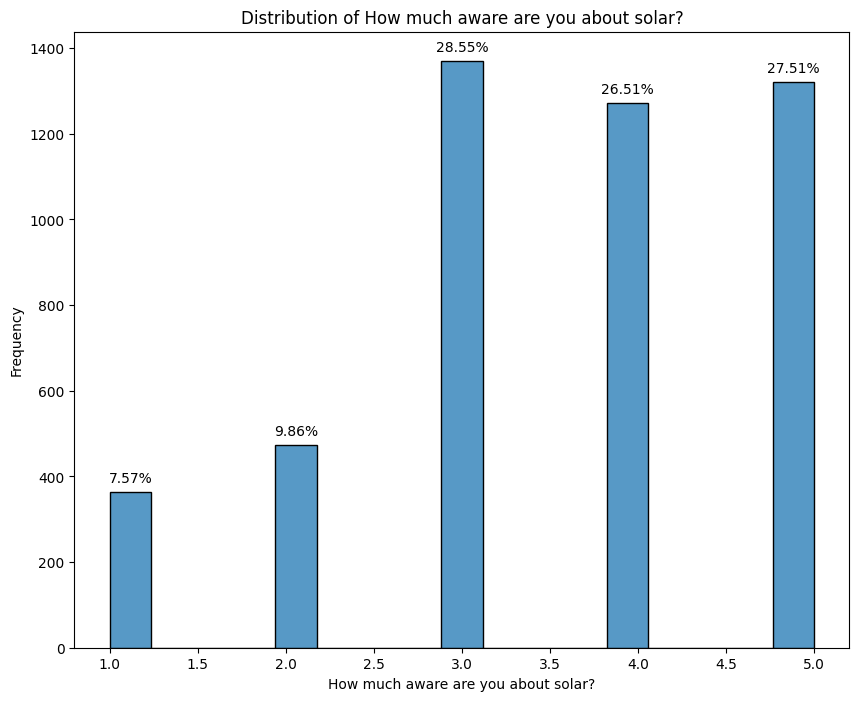

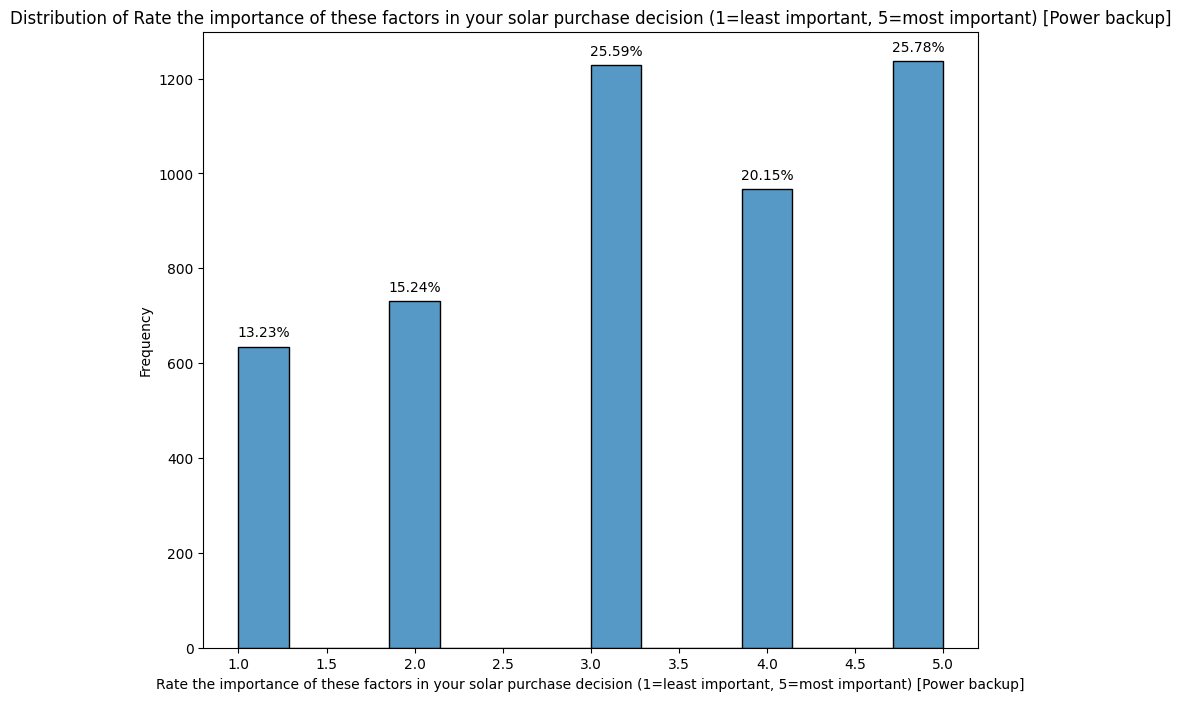

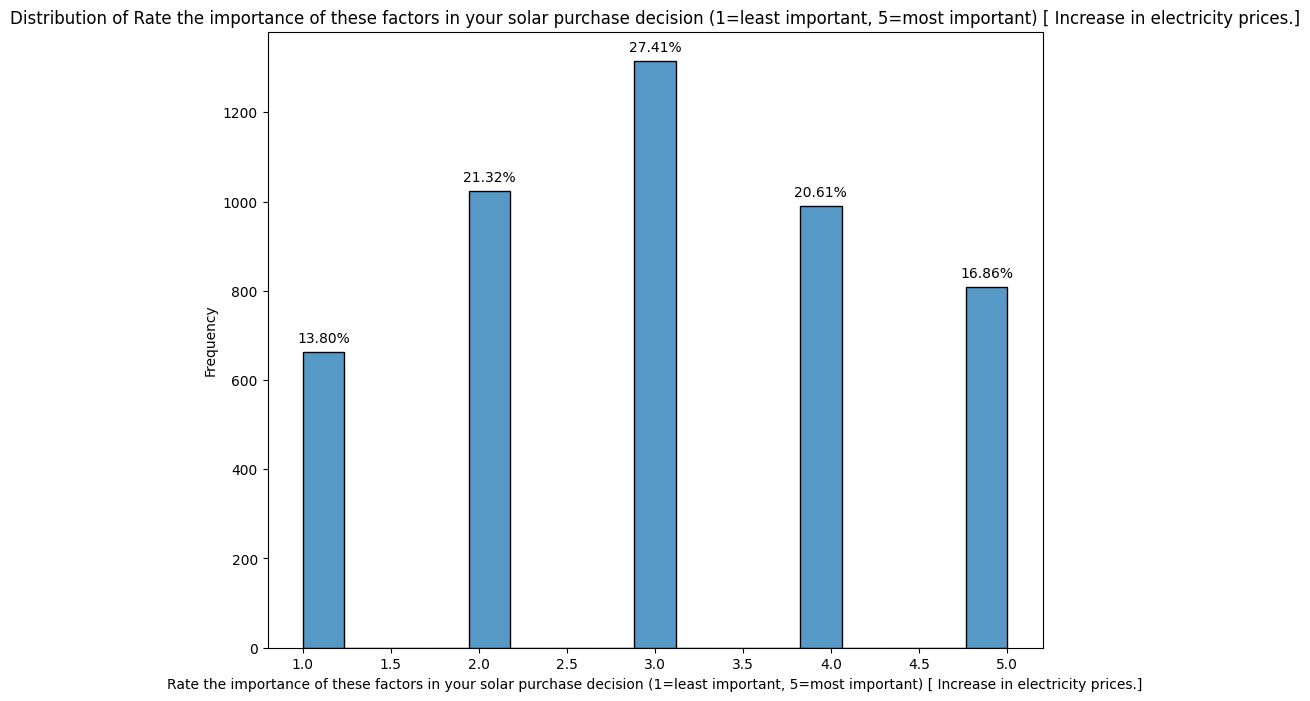

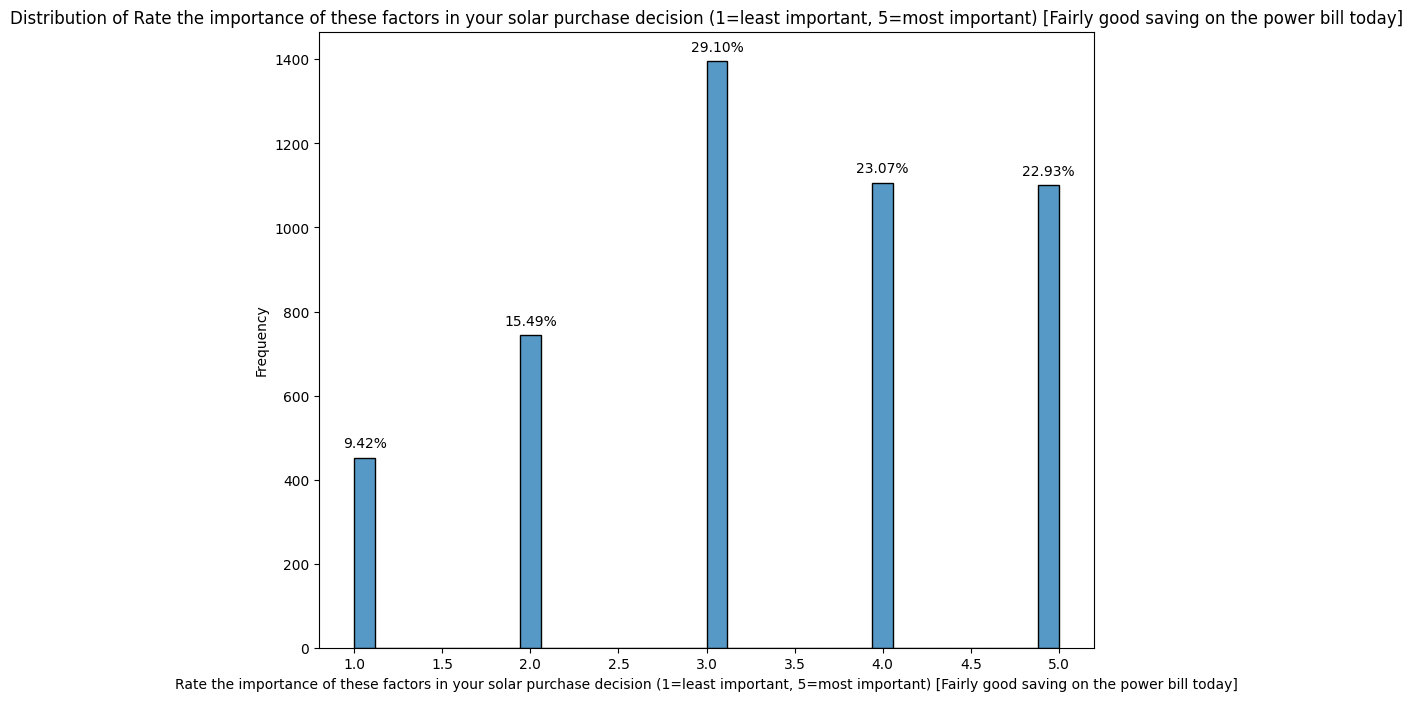

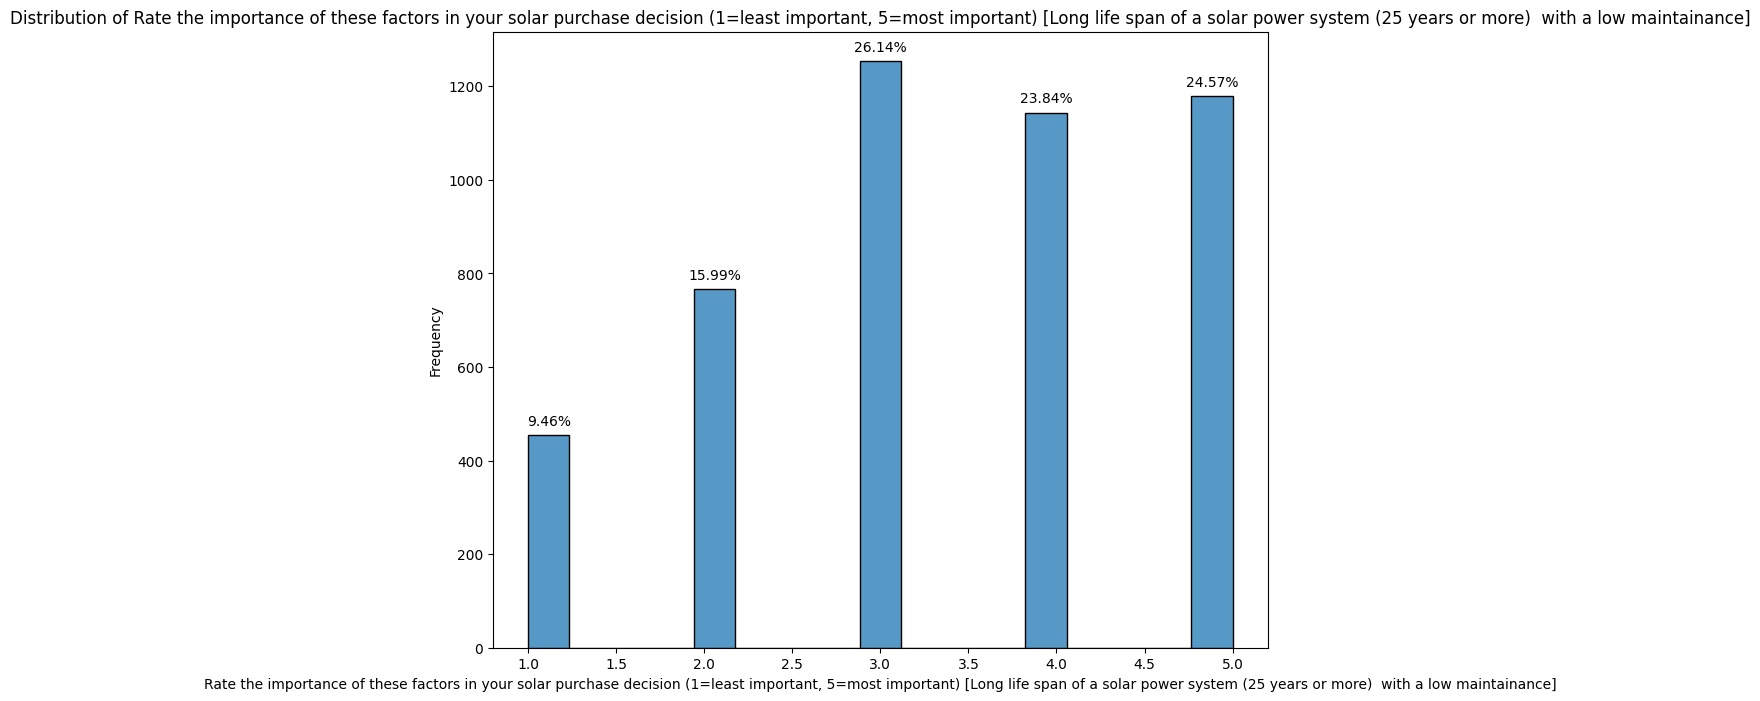

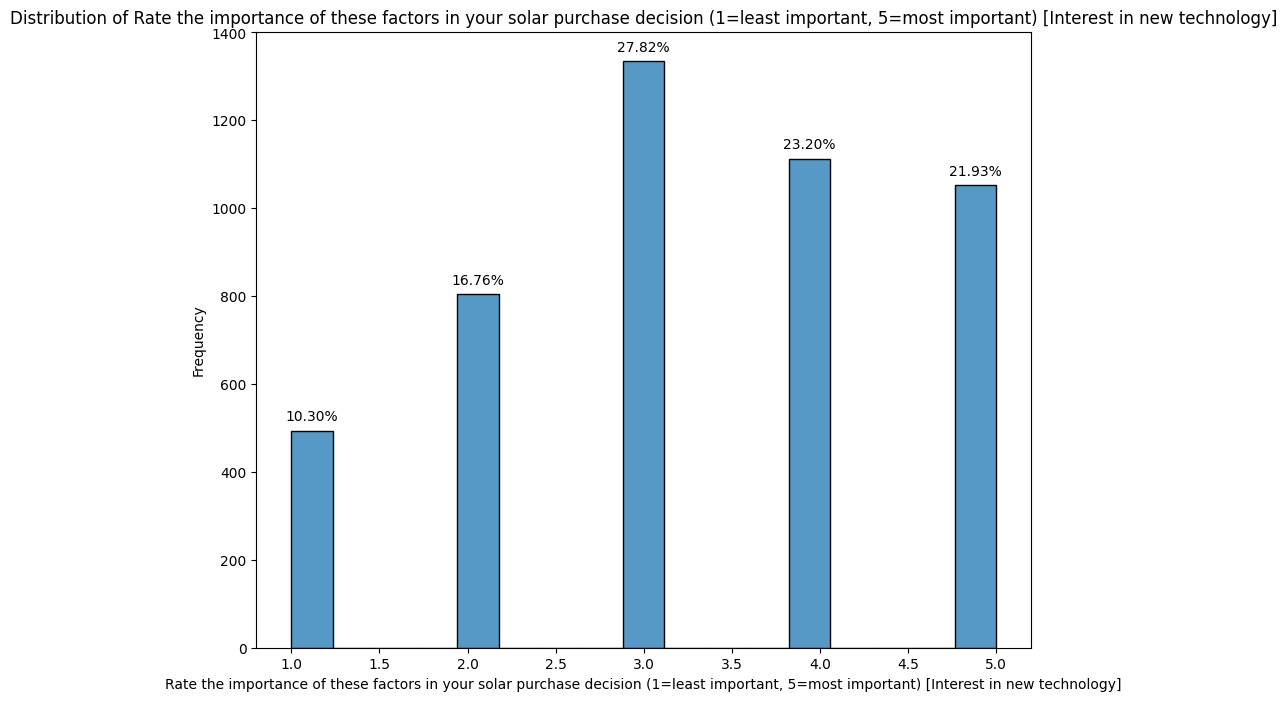

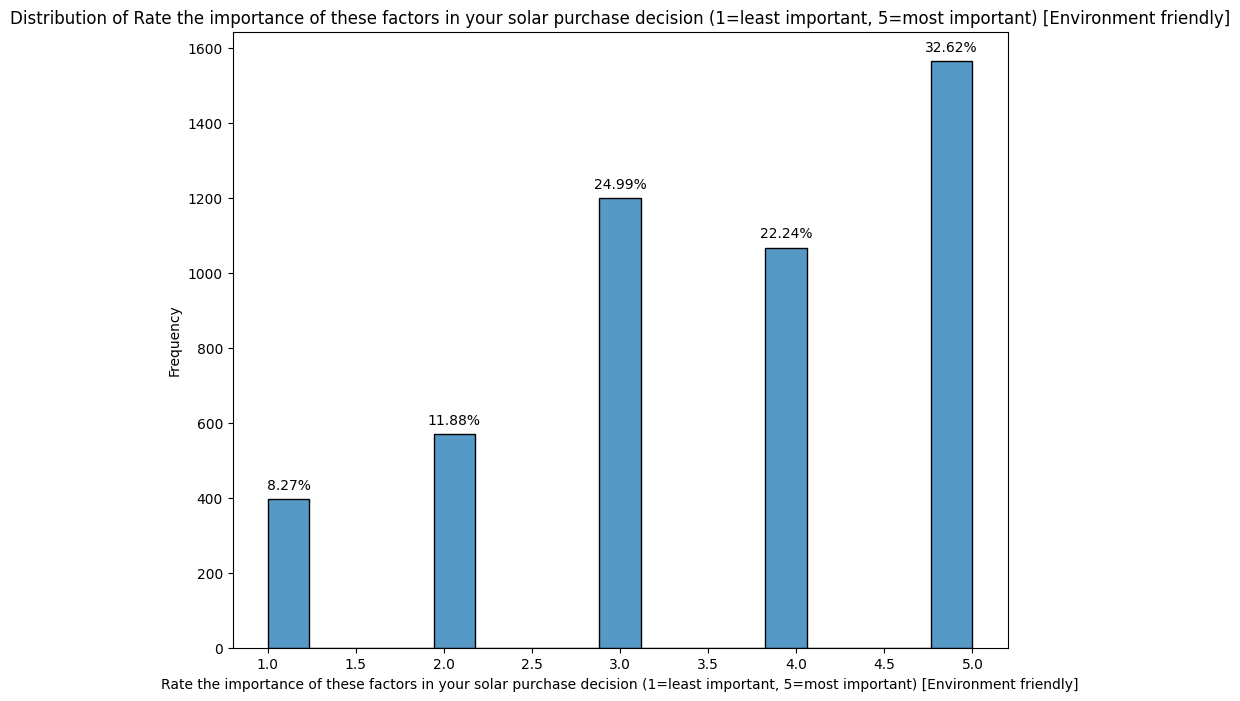

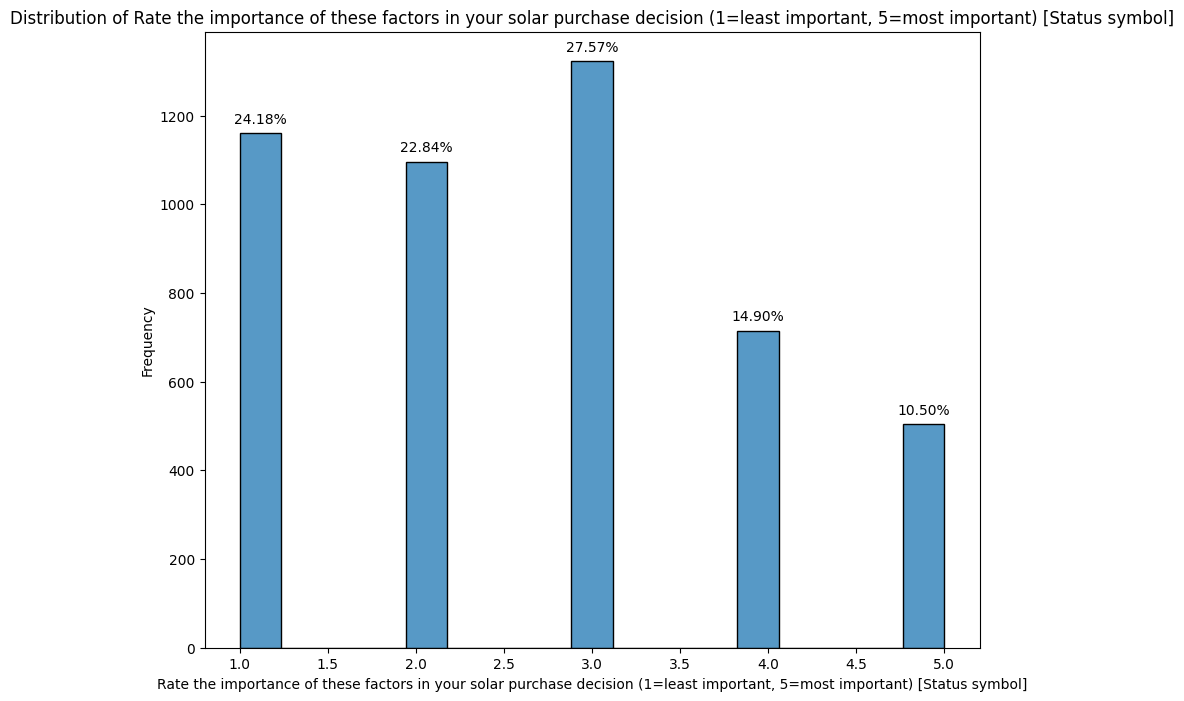

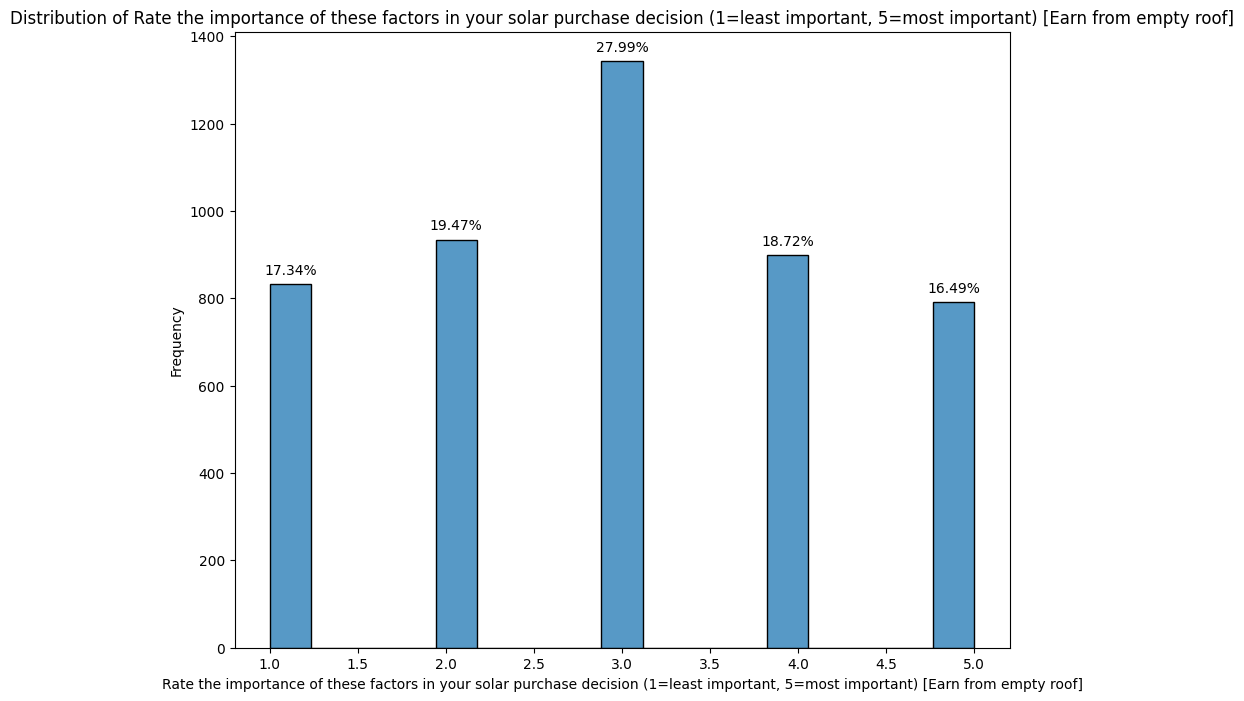

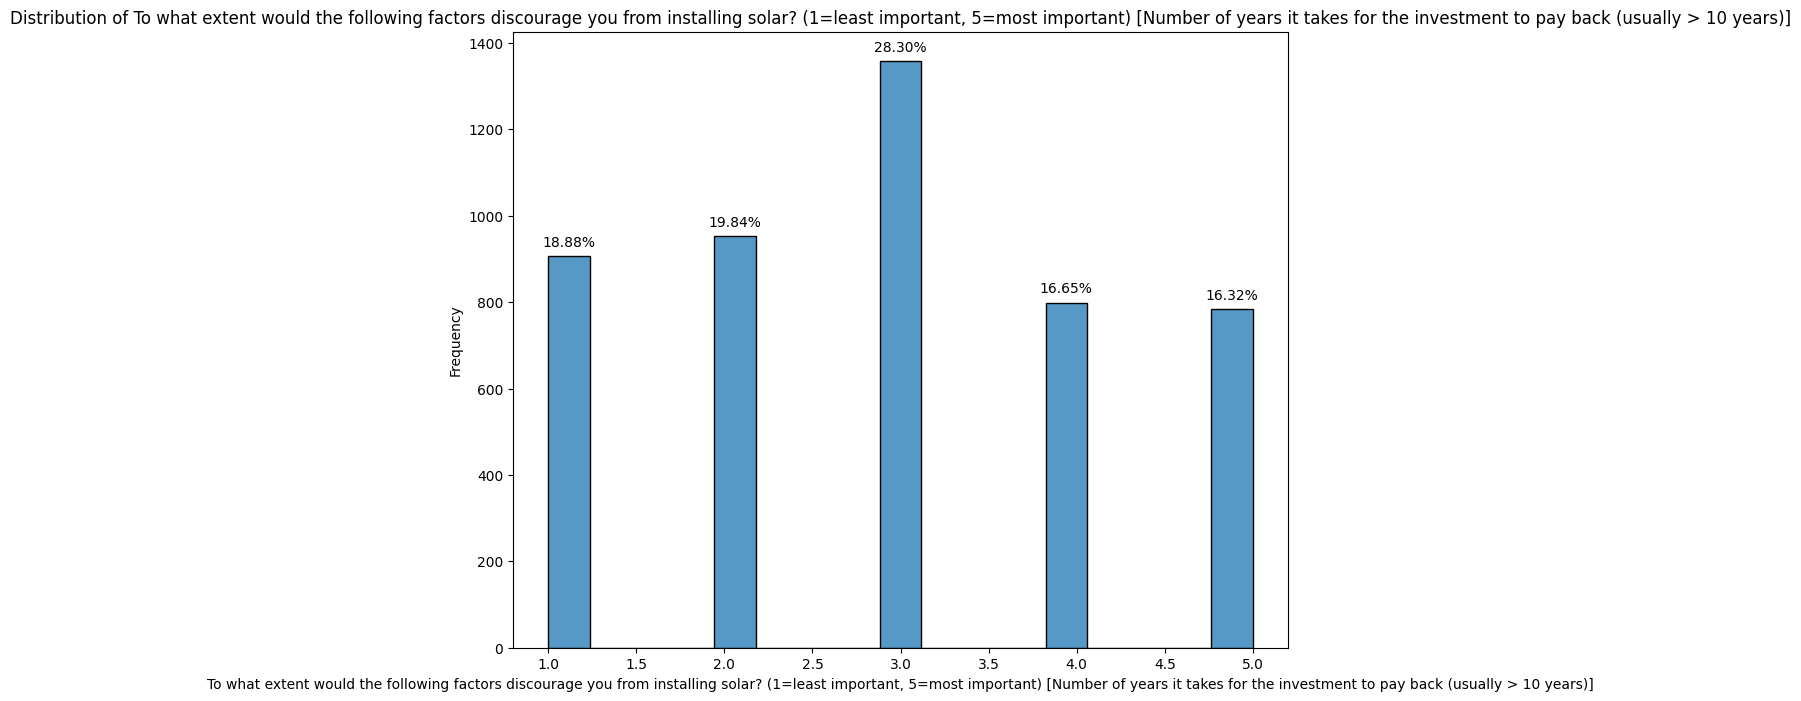

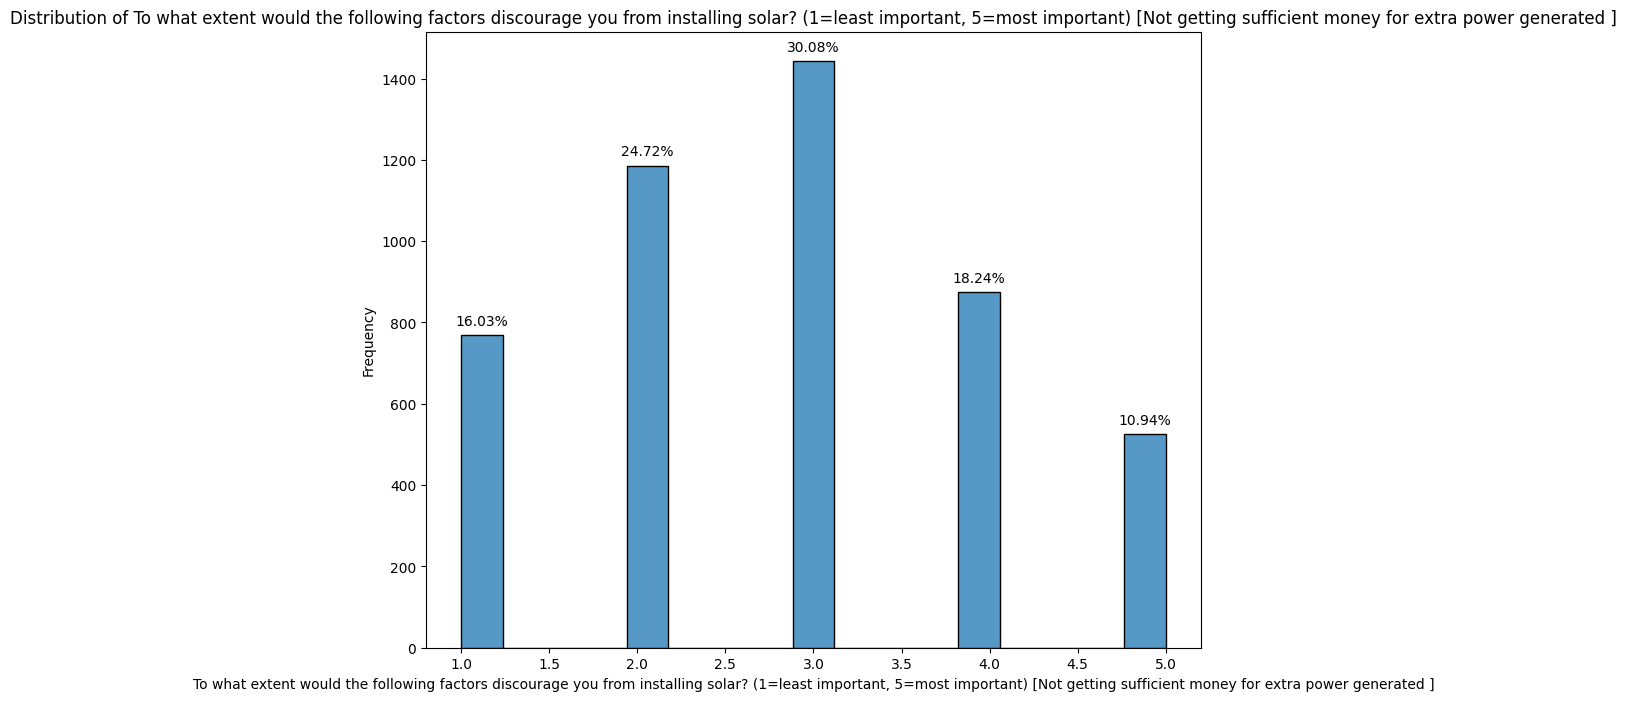

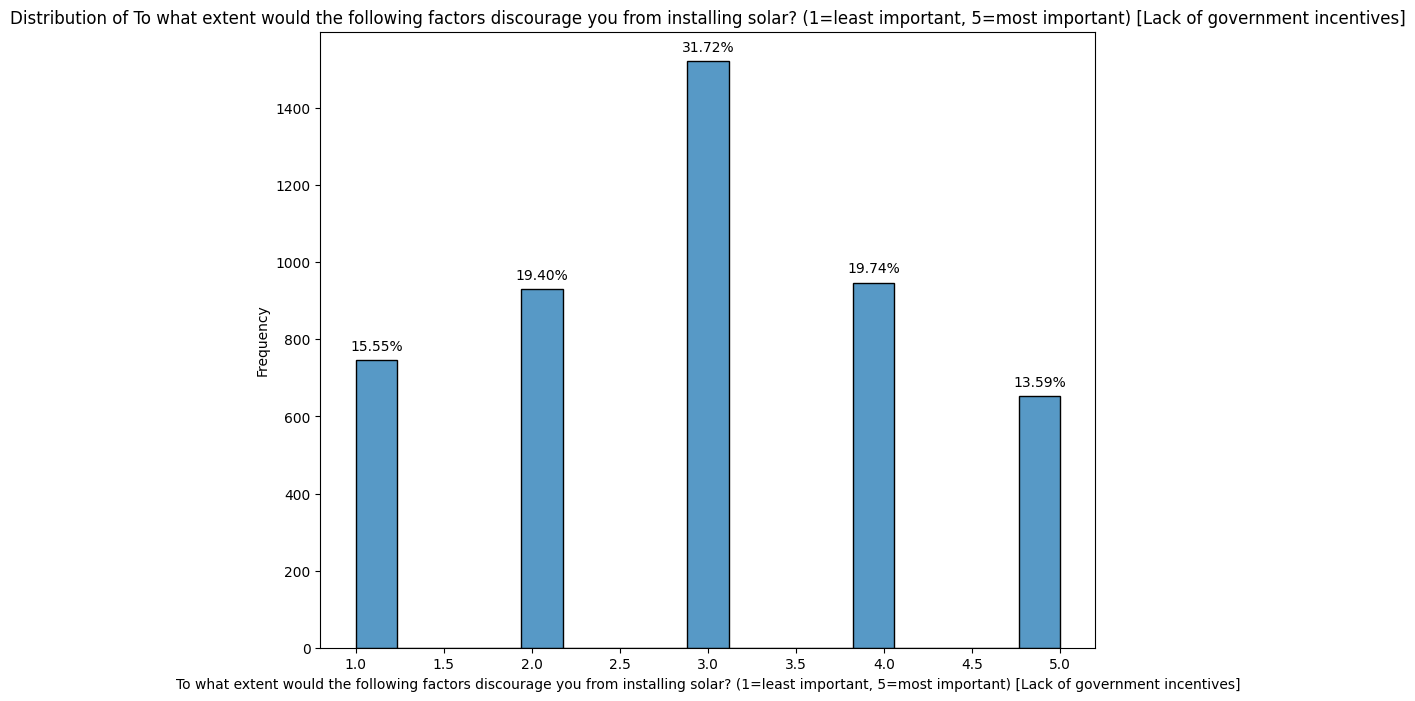

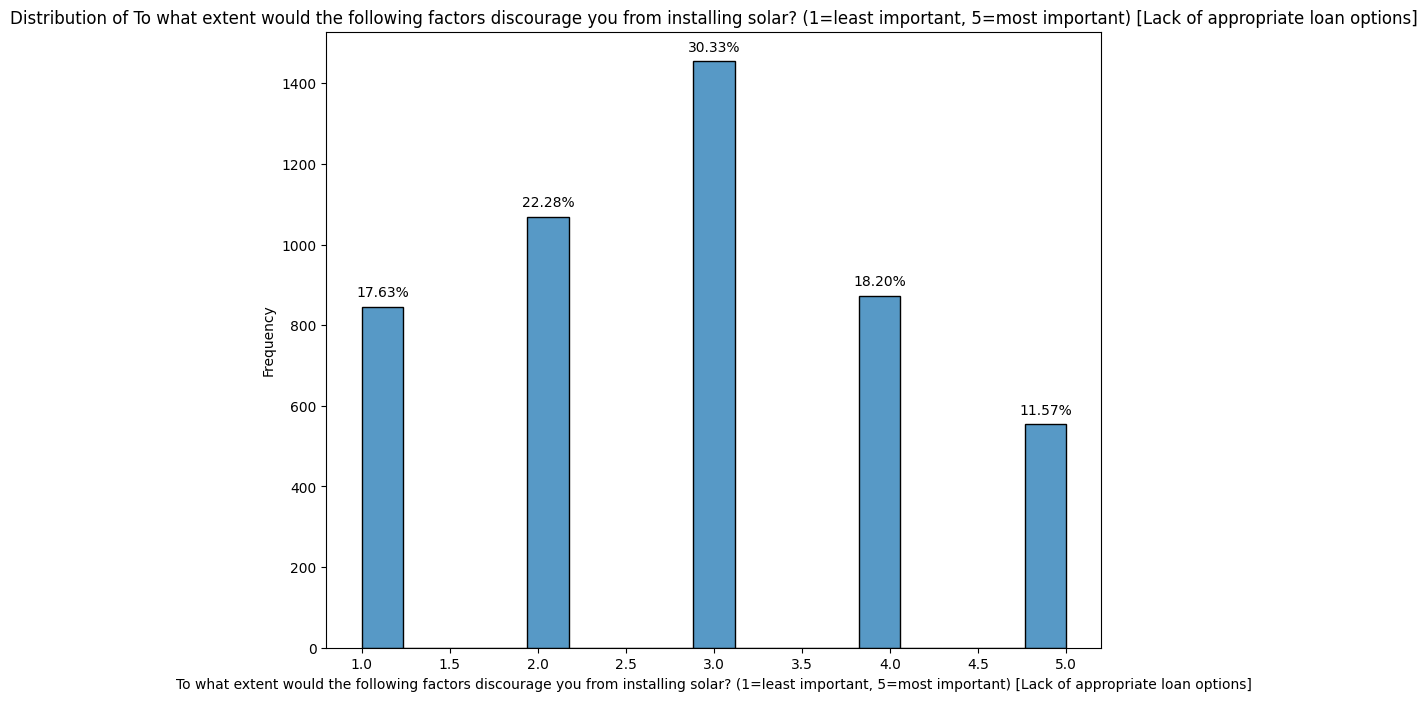

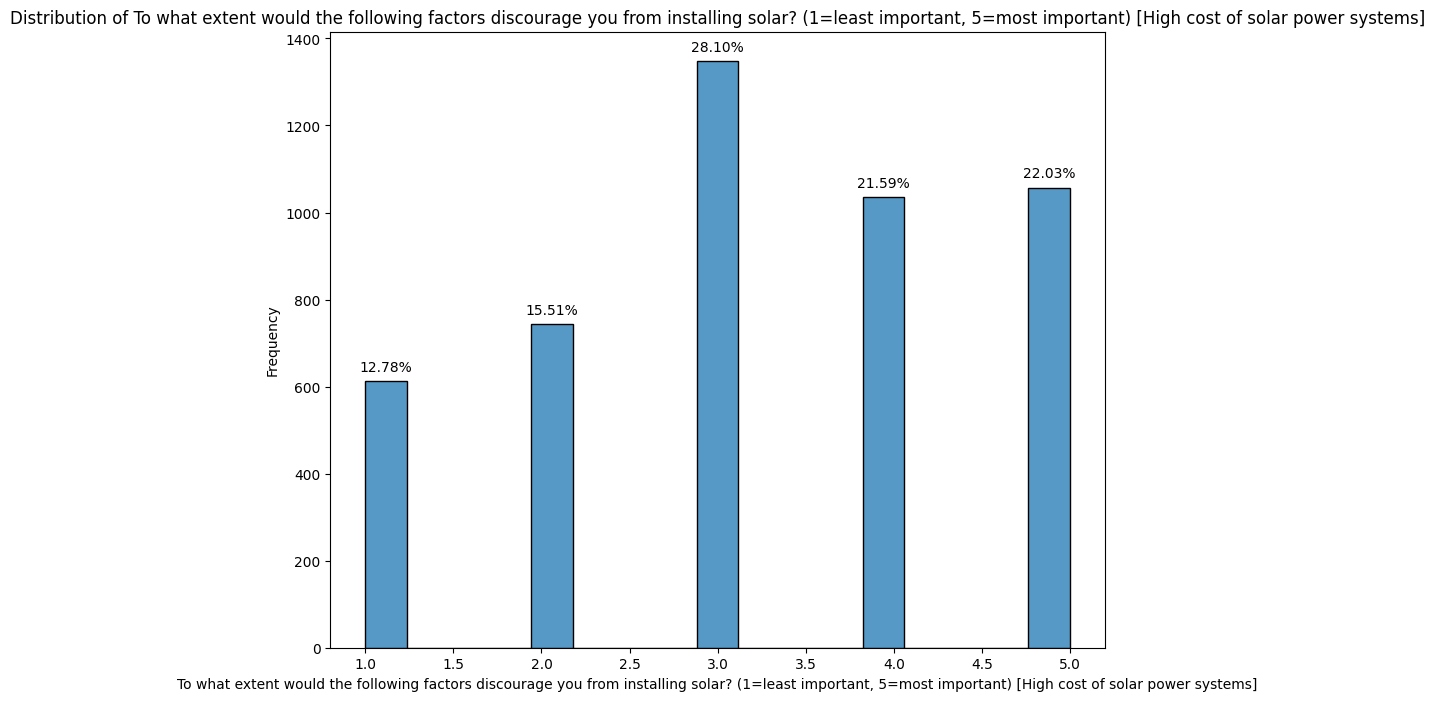

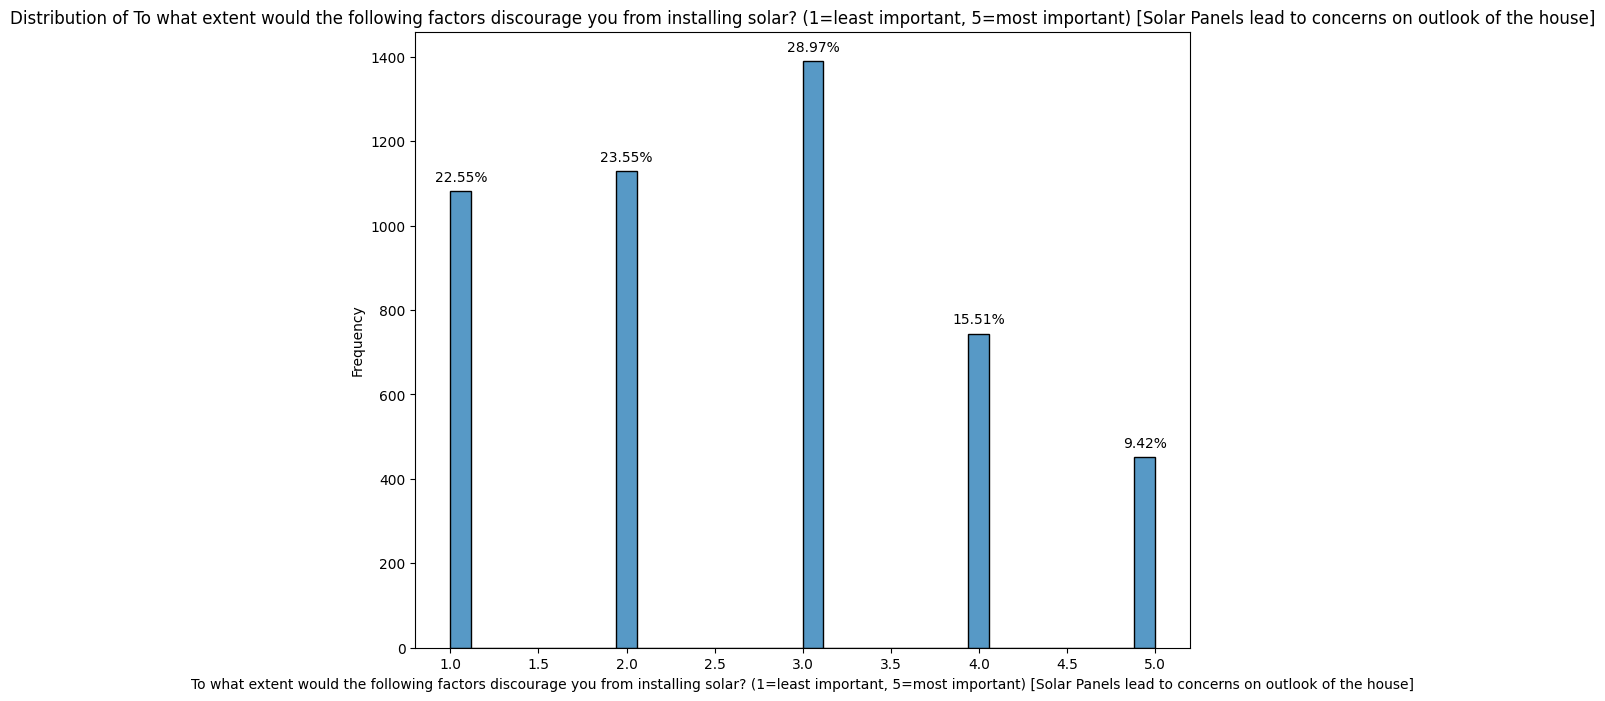

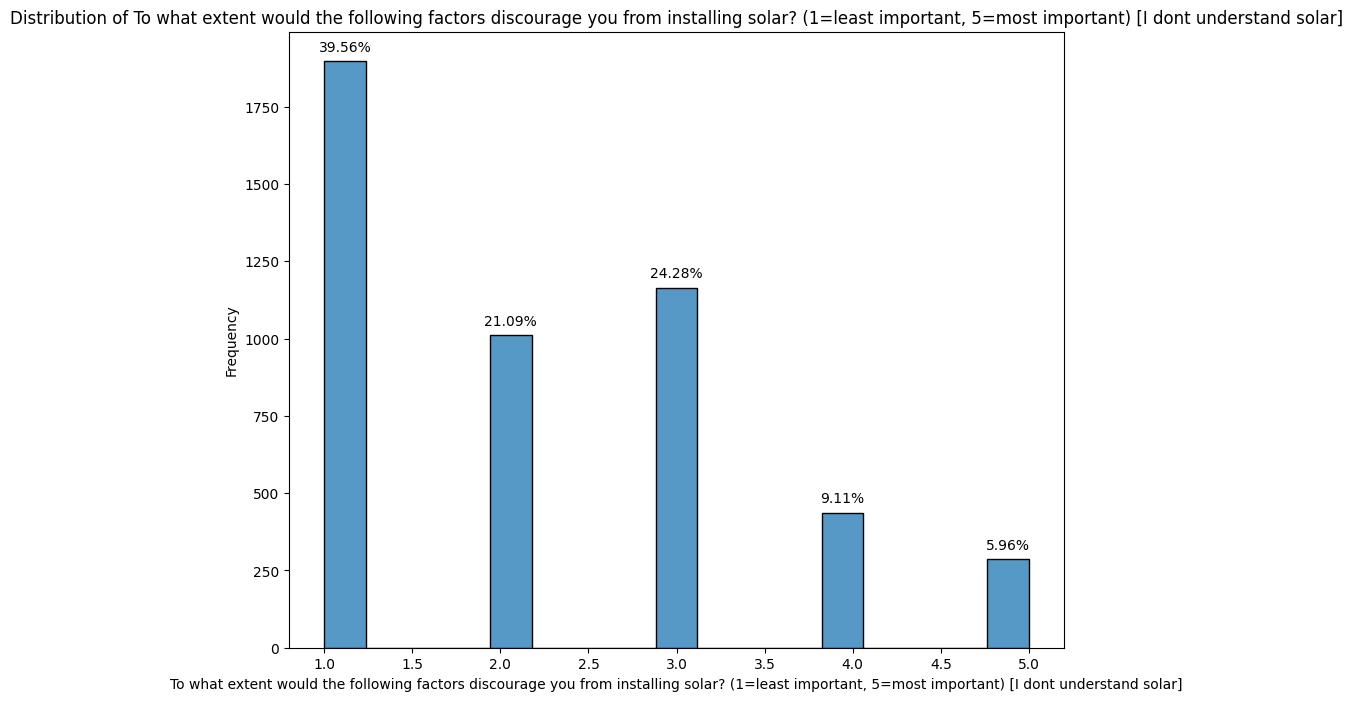

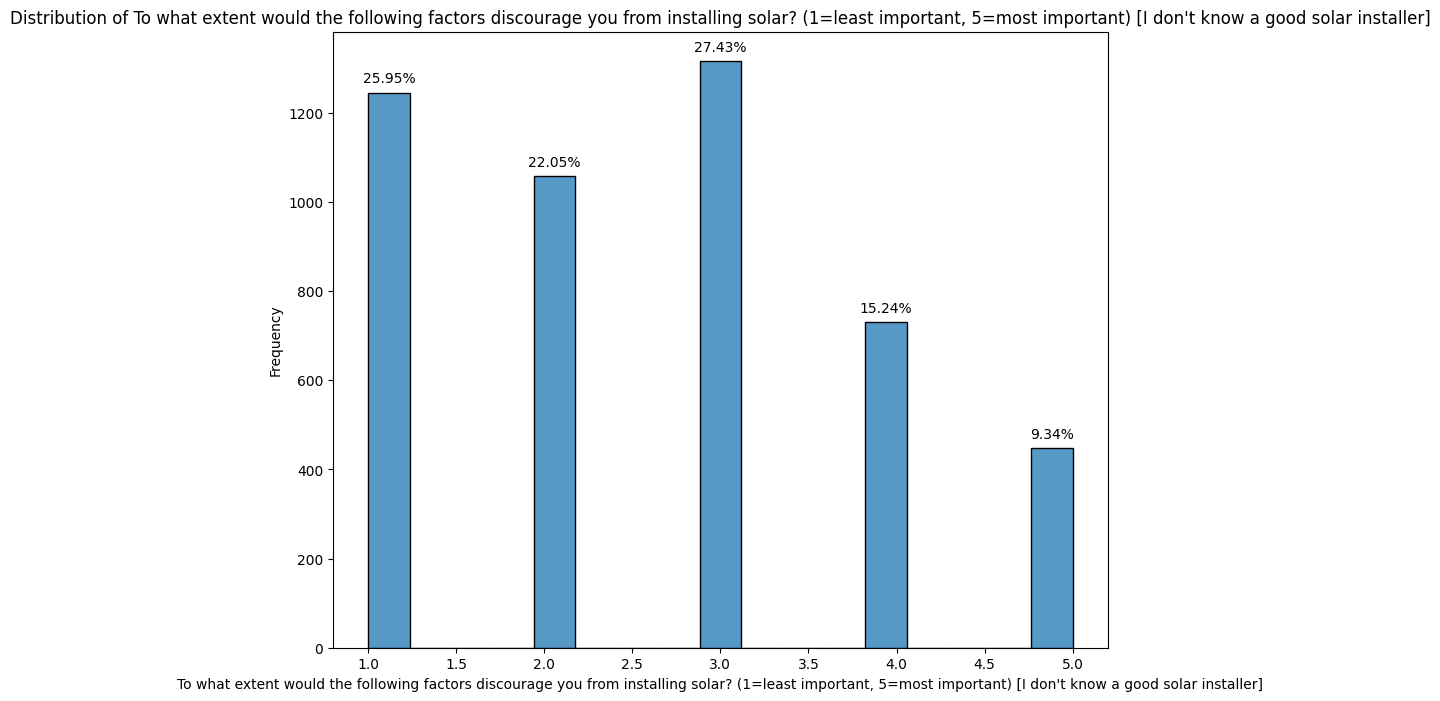

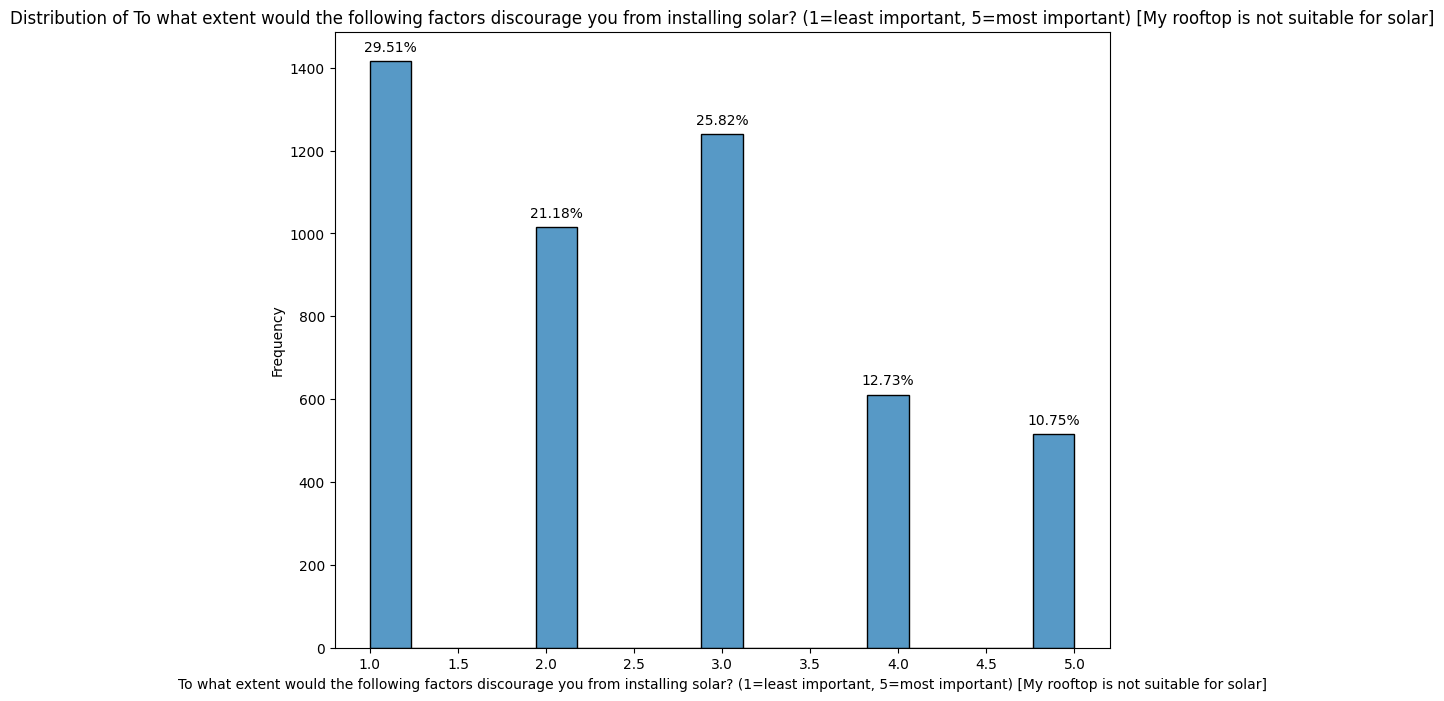

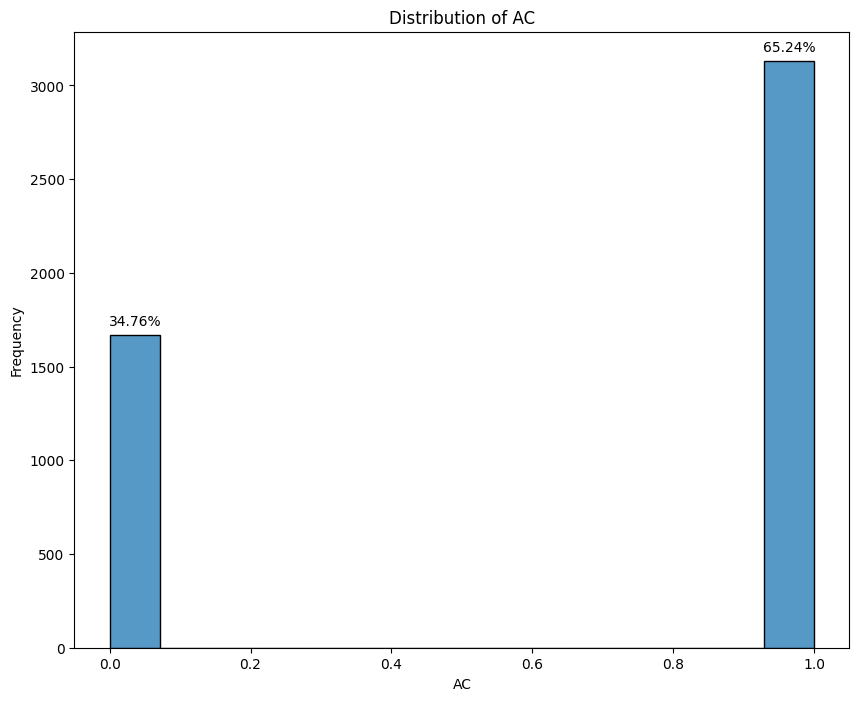

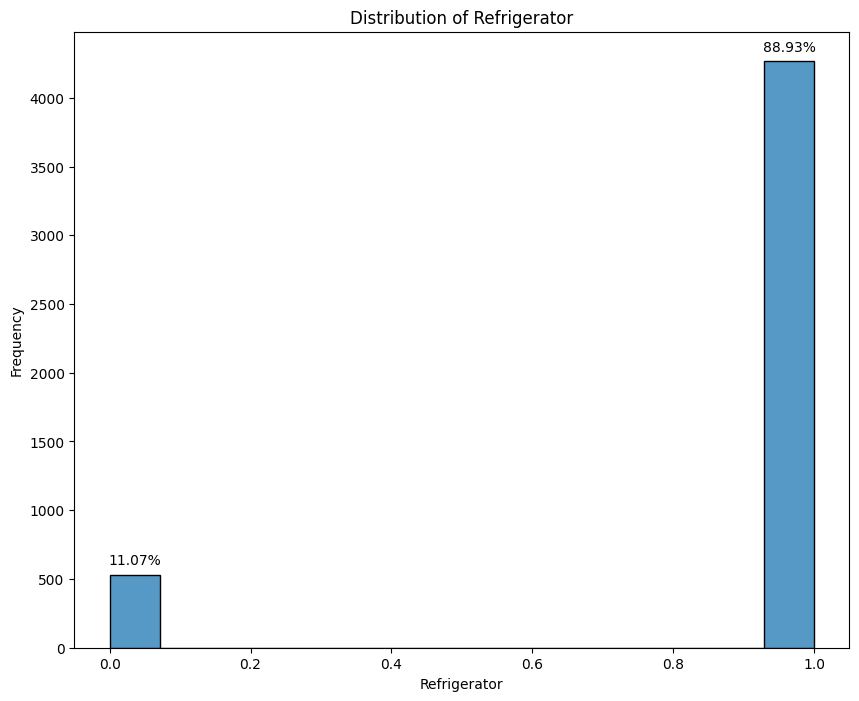

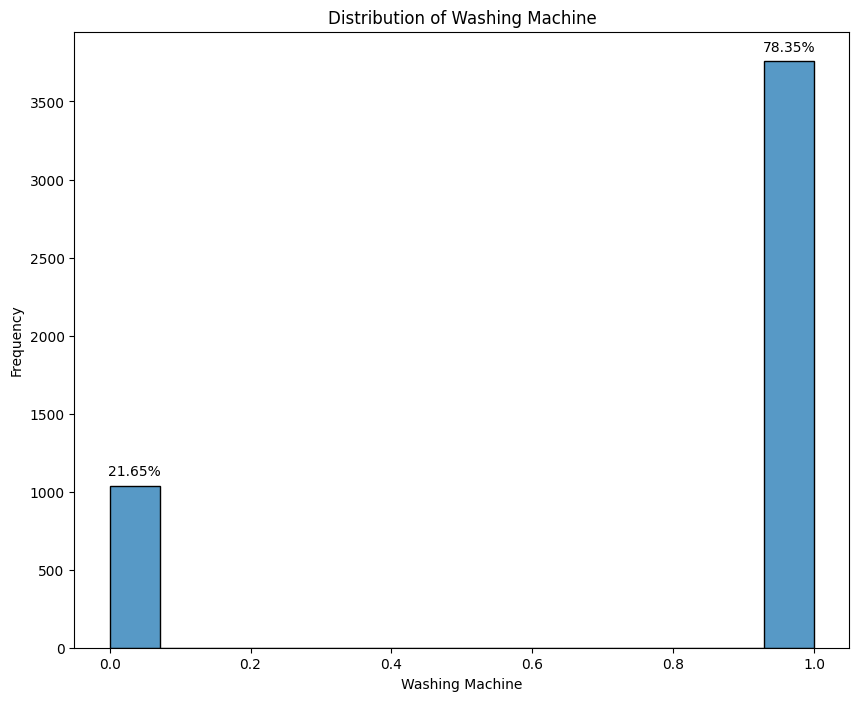

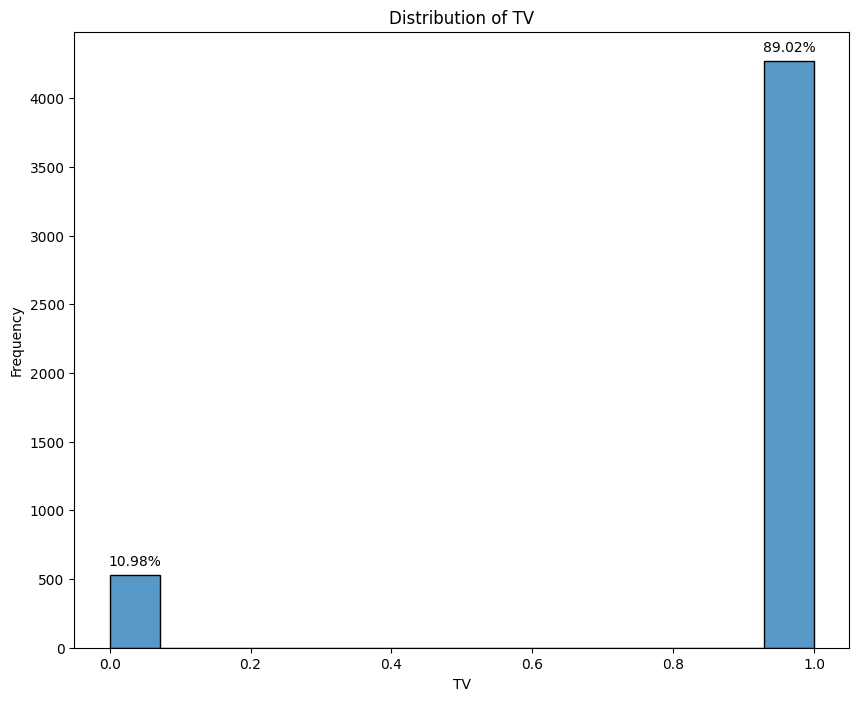

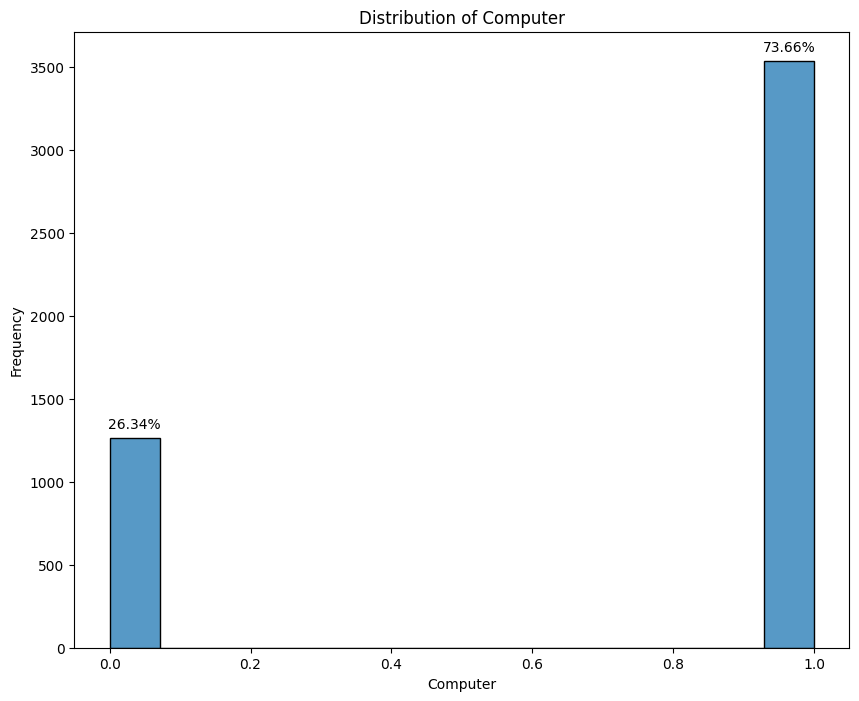

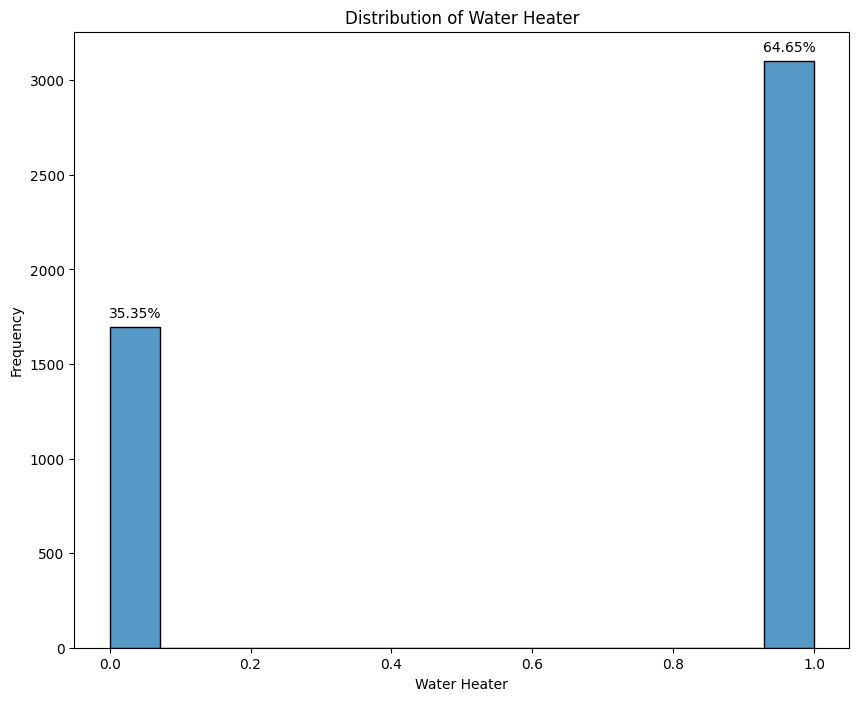

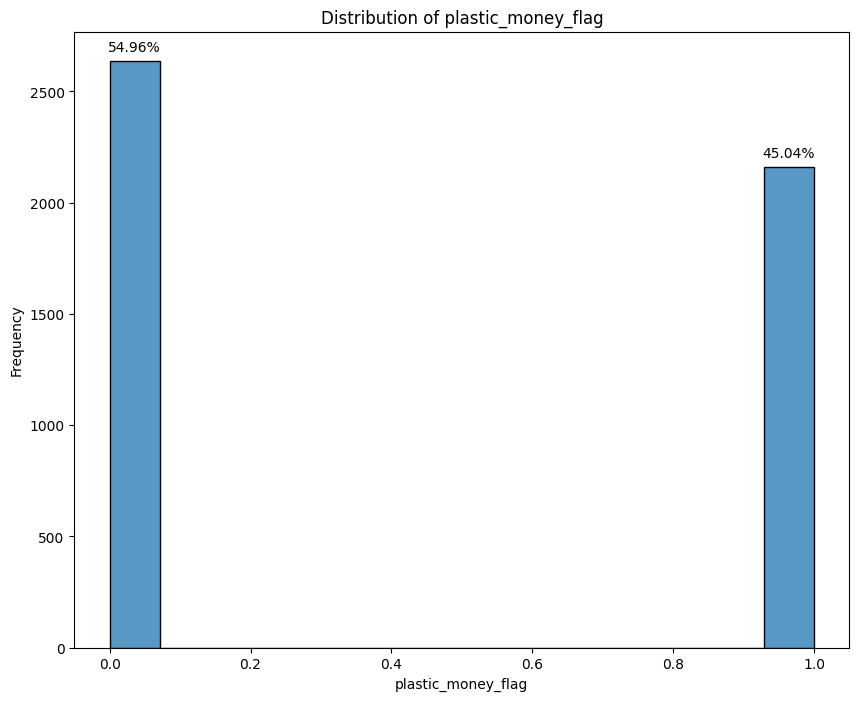

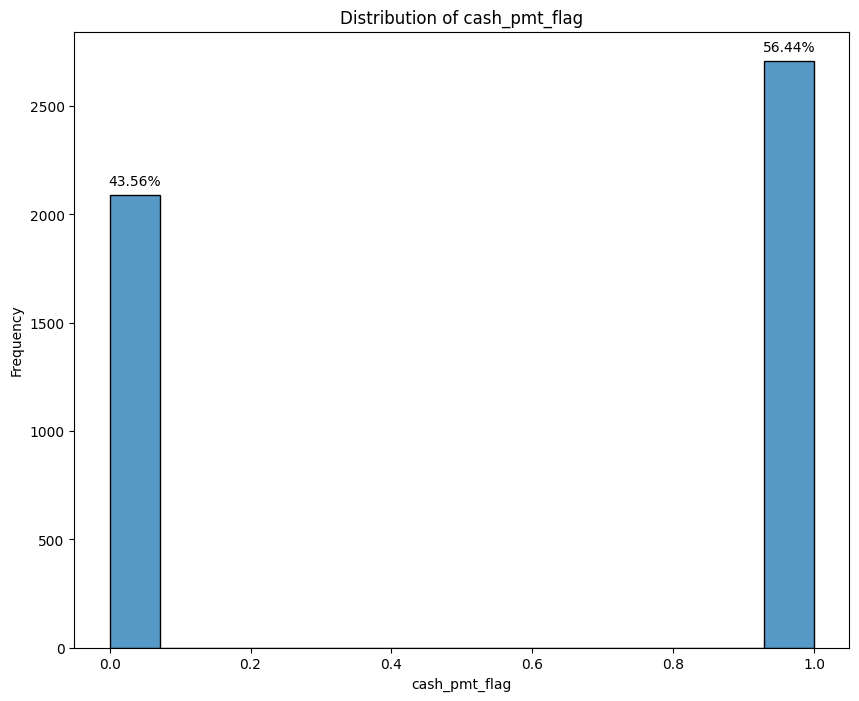

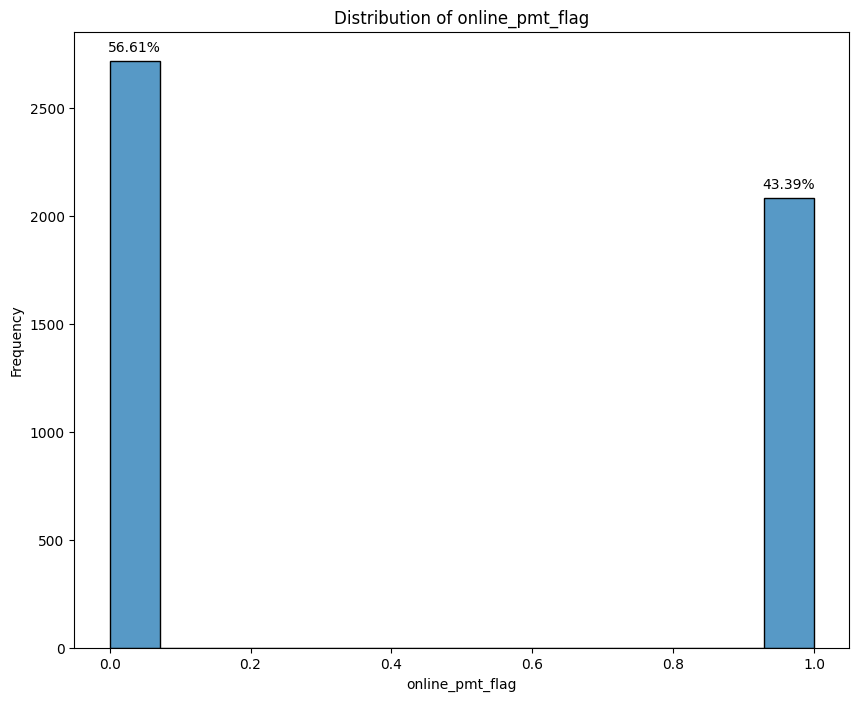

In [64]:
numerical_feats = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_feats:
    plt.figure(figsize=(10, 8))
    ax = sns.histplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add percentage annotations on top of each bar
    for p in ax.patches:
        percentage = p.get_height() / len(df) * 100
        if percentage != 0:
            ax.annotate(f'{p.get_height()/len(df)*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

## Bivariate Analysis

In [66]:
# for cat_feature in categorical_feats:
#     for num_feature in numerical_feats:
#         plt.figure(figsize=(10, 6))
#         sns.violinplot(x=cat_feature, y=num_feature, data=df)
#         plt.title(f'Violin Plot for {num_feature} by {cat_feature}')
#         plt.show()